In [1]:
import yfinance
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
import numpy as np
import tsfresh
from tsfresh.utilities.dataframe_functions import impute
import seaborn as sns
def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
    return df
def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(str(soup.find_all("table")))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")
    return df
def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        html_table = str(soup.find_all("table"))
        
        # 'StringIO' kullanarak HTML dizgesini oku
        df = pd.read_html(StringIO(html_table))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")
        return pd.DataFrame()  # Hata durumunda boş bir DataFrame döndür
    
    return df


In [2]:
sectors=fetch_sectors_names()
indusrty=fetch_industry_names()

C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\2191847841.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(soup.find_all("table")))[0]
C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\2191847841.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df=pd.read_html(str(soup.find_all("table")))[0]


In [3]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1384,"9,689.50B",2.41%,14.71,17.75%,0.54%,11.54%
1,Healthcare,1217,"8,168.29B",0.43%,50.93,4.07%,3.28%,7.75%
2,Technology,788,17.72T,0.43%,44.88,13.16%,0.32%,14.87%
3,Industrials,652,"5,478.41B",1.11%,26.71,7.32%,0.55%,17.56%
4,Consumer Discretionary,578,"7,264.65B",0.65%,27.33,5.95%,0.32%,2.23%
5,Real Estate,264,"1,506.14B",4.13%,50.70,8.89%,-0.12%,6.92%
6,Materials,263,"2,069.59B",1.56%,19.61,8.68%,0.47%,2.27%
7,Communication Services,260,"5,361.58B",1.09%,28.01,10.40%,0.29%,2.10%
8,Energy,253,"3,646.11B",2.85%,8.01,12.42%,0.43%,18.22%
9,Consumer Staples,241,"4,035.50B",1.45%,29.74,4.72%,0.44%,12.15%


In [4]:
import os

# Verilerin kaydedileceği dizini oluştur
output_directory = '../data/stock_sectors'
os.makedirs(output_directory, exist_ok=True)

# Verileri dosyaya kaydet
fetch_data(sectors='energy').to_csv('../data/stock_sectors/energy.csv')
fetch_data(sectors='financials').to_csv('../data/stock_sectors/financials.csv')
fetch_data(sectors='healthcare').to_csv('../data/stock_sectors/healthcare.csv')
fetch_data(sectors='technology').to_csv('../data/stock_sectors/technology.csv')
fetch_data(sectors='utilities').to_csv('../data/stock_sectors/utilities.csv')
fetch_data(sectors='real-estate').to_csv('../data/stock_sectors/real-estate.csv')
fetch_data(sectors='materials').to_csv('../data/stock_sectors/materials.csv')
fetch_data(sectors='technology').to_csv('../data/stock_sectors/technology.csv')
fetch_data(sectors='industrials').to_csv('../data/stock_sectors/industrials.csv')
fetch_data(sectors='consumer-staples').to_csv('../data/stock_sectors/consumer-staples.csv')
fetch_data(sectors='consumer-discretionary').to_csv('../data/stock_sectors/consumer-discretionary.csv')
fetch_data(sectors='communication-services').to_csv('../data/stock_sectors/communication-services.csv')

## Load and Check Data (Finance)

Üç sektör için de aynı adımları izlediğim için bu aşamada Finance, Technology ve Healthcare aşamalarında genel olarak yaptıklarımdan bahsedeceğim. İlk olarak veriyi yükleyip sembollere örneğin 'finance.Symbol' koduyla ulaştıktan sonra tüm sektörler için sembolleri ticker_list adlı üç listede tuttum çünkü uzun bir liste çıktısı notebook'un karmaşık görünmesine sebep oluyordu.

In [5]:
finance = pd.read_csv('../YZUP_Ara_Proje_HaticeKubraDogan/data/stock_sectors/financials.csv')
finance

,Unnamed: 0,Symbol,Company Name,Market Cap,% Change,Volume,Revenue
0,0,BRK.B,Berkshire Hathaway Inc.,876.78B,0.05%,1817892,439.34B
1,1,V,Visa Inc.,576.29B,1.20%,5594257,33.35B
2,2,JPM,JPMorgan Chase & Co.,542.34B,0.82%,4164036,158.10B
3,3,MA,Mastercard Incorporated,437.68B,0.79%,1273262,25.10B
4,4,BAC,Bank of America Corporation,283.20B,0.20%,24020877,98.58B
...,...,...,...,...,...,...,...
997,997,NCPL,Netcapital Inc.,2.00M,-4.23%,572363,8.94M
998,998,TIRX,Tian Ruixiang Holdings Ltd,1.90M,1.25%,26702,1.13M
999,999,RELI,"Reliance Global Group, Inc.",1.84M,0.88%,53661,14.57M
1000,1000,DXF,Dunxin Financial Holdings Limited,1.33M,5.91%,64881,-2.77M


In [6]:
ticker_list = ['BRK.B', 'V', 'JPM', 'MA', 'BAC', 'WFC', 'AXP', 'BX', 'HSBC', 'MS', 'RY', 'HDB', 'SPGI', 'MUFG', 'GS', 'BLK', 'SCHW', 'PGR', 'C', 'TD', 'CB', 'MMC', 'UBS', 'IBN', 'KKR', 'ICE', 'CME', 'SMFG', 'MCO', 'SAN', 'BMO', 'USB', 'ITUB', 'BN', 'BBVA', 'PYPL', 'AON', 'APO', 'BNS', 'PNC', 'NU', 'AJG', 'COF', 'MET', 'MFG', 'AIG', 'TRV', 'TFC', 'ING', 'AFL', 'CM', 'IBKR', 'MSCI', 'MFC', 'BSBR', 'ALL', 'BK', 'AMP', 'ARES', 'PRU', 'LYG', 'NDAQ', 'BCS', 'ACGL', 'SLF', 'DFS', 'BBD', 'NWG', 'HIG', 'PUK', 'DB', 'WTW', 'SYM', 'TROW', 'RJF', 'FITB', 'OWL', 'RKT', 'IX', 'BRO', 'MTB', 'TW', 'STT', 'WRB', 'ERIE', 'FCNCO', 'FCNCA', 'KB', 'LPLA', 'CBOE', 'MKL', 'HBAN', 'PFG', 'CINF', 'FDS', 'RF', 'NMR', 'SHG', 'SYF', 'CG', 'L', 'NTRS', 'EG', 'BAM', 'TPG', 'CFG', 'CRBG', 'BEN', 'RYAN', 'XP', 'FNF', 'KEY', 'BAP', 'MORN', 'ARCC', 'RNR', 'RGA', 'BCH', 'CNA', 'KNSL', 'GL', 'ALLY', 'EQH', 'AFG', 'UWMC', 'EWBC', 'AEG', 'UNM', 'AIZ', 'JEF', 'BSAC', 'SEIC', 'HLI', 'PRI', 'MKTX', 'WF', 'WBS', 'FHN', 'FUTU', 'ORI', 'CIB', 'SF', 'EVR', 'SOFI', 'IVZ', 'VOYA', 'CMA', 'CFR', 'CBSH', 'CACC', 'RLI', 'WAL', 'PNFP', 'SIGI', 'SSB', 'ZION', 'BPOP', 'HLNE', 'ESNT', 'WTFC', 'PB', 'OBDC', 'FAF', 'SNV', 'OMF', 'MTG', 'BOKF', 'FSK', 'MARA', 'FCFS', 'AMG', 'AXS', 'JHG', 'CADE', 'AGO', 'ONB', 'OZK', 'FNB', 'HOMB', 'WU', 'UBSI', 'BNRE', 'RDN', 'COOP', 'ACT', 'THG', 'JXN', 'LNC', 'GBCI', 'FFIN', 'SLM', 'DNB', 'FG', 'ESGR', 'FRHC', 'AEL', 'WTM', 'BNRE.A', 'PFSI', 'VLY', 'COLB', 'GGAL', 'CRVL', 'UMBF', 'PJT', 'MAIN', 'AB', 'STEP', 'HWC', 'KMPR', 'CNS', 'TFSL', 'MC', 'SFBS', 'AMTD', 'LAZ', 'BGC', 'IBOC', 'NNI', 'ABCB', 'IFS', 'ASB', 'LU', 'UCBI', 'APAM', 'WD', 'VIRT', 'FHI', 'BUR', 'HGTY', 'BMA', 'BHF', 'BANF', 'AVAL', 'CNO', 'CATY', 'AX', 'PIPR', 'HTGC', 'GSHD', 'TCBI', 'FBP', 'GNW', 'FIBK', 'FHB', 'GBDC', 'AMK', 'WSFS', 'INTR', 'MCY', 'AUB', 'VCTR', 'FULT', 'CBU', 'QFIN', 'BOH', 'SFNC', 'CVBF', 'NMIH', 'EBC', 'BANC', 'PUYI', 'NYCB', 'WAFD', 'UPST', 'PPBI', 'INDB', 'PSEC', 'PAX', 'SNEX', 'PRK', 'SBCF', 'FFBC', 'SPNT', 'BKU', 'FRME', 'HTH', 'TOWN', 'AGM', 'AGM.A', 'TSLX', 'TBBK', 'MBIN', 'NAVI', 'BRP', 'DFIN', 'IBTX', 'PLMR', 'BFH', 'LOB', 'VRTS', 'ENVA', 'NWLI', 'OFG', 'WSBC', 'CLBK', 'RNST', 'TFIN', 'LKFN', 'BBAR', 'CUBI', 'GSBD', 'STC', 'FBK', 'BBUC', 'NBTB', 'GCMG', 'TRMK', 'BANR', 'OCSL', 'CHCO', 'FIHL', 'HTLF', 'EFSC', 'NWBI', 'FBNC', 'FINV', 'DWAC', 'HMN', 'SKWD', 'NTB', 'FCF', 'HOPE', 'SYBT', 'NMFC', 'NBHC', 'BUSE', 'CASH', 'STEL', 'WT', 'WABC', 'PWP', 'SRCE', 'NRDS', 'NIC', 'STBA', 'TRUP', 'LMND', 'SAFT', 'ECPG', 'TCBK', 'PFS', 'EIG', 'HCI', 'CET', 'VBTX', 'CSWC', 'BLX', 'BCSF', 'PFBC', 'PEBO', 'PRAA', 'AMSF', 'BBDC', 'SCRM', 'SASR', 'GABC', 'BHLB', 'CVII', 'QCRH', 'OBK', 'PX', 'RBCAA', 'SII', 'MFIC', 'BY', 'CIFR', 'OCFC', 'LC', 'BRKL', 'GHLD', 'BSIG', 'SBSI', 'BFC', 'SLRC', 'LPRO', 'HG', 'CGBD', 'MTAL', 'AMTB', 'LDI', 'FBMS', 'ALTI', 'BRDG', 'BITF', 'WRLD', 'LBAI', 'CFFN', 'ABL', 'GRNT', 'ECC', 'CNOB', 'AMAL', 'FMBH', 'CTBI', 'TMP', 'PFC', 'AC', 'EGBN', 'DCOM', 'NOAH', 'PFLT', 'AMBC', 'TRIN', 'GHIX', 'TIGR', 'HFWA', 'RILY', 'CFB', 'AACT', 'AMRK', 'CCAP', 'ROOT', 'HUT', 'PRA', 'GSBC', 'TCPC', 'MCBS', 'VINP', 'OSBC', 'TIPT', 'HBT', 'FCBC', 'FDUS', 'UVSP', 'CION', 'IGIC', 'MBWM', 'NBBK', 'SAGA', 'UVE', 'EZPW', 'UFCS', 'BFST', 'VEL', 'HBNC', 'QD', 'WULF', 'TREE', 'PSBD', 'TRST', 'CPF', 'IREN', 'HTBK', 'XPDB', 'MSBI', 'CATC', 'APLD', 'SUPV', 'IBCP', 'CCB', 'GAIN', 'SMBC', 'FMNB', 'AMNB', 'EQBK', 'GCBC', 'CAC', 'RWAY', 'GDOT', 'CCBG', 'HAFC', 'ALCC', 'HONE', 'WDH', 'YRD', 'DGICB', 'GLAD', 'FFWM', 'DGICA', 'THFF', 'NFBK', 'HIPO', 'BETR', 'HTBI', 'ATLC', 'PNNT', 'WASH', 'MCB', 'ACIC', 'ANSC', 'SPFI', 'DHIL', 'ALRS', 'PGC', 'SLAM', 'GLRE', 'CCNE', 'RRAC', 'GFR', 'AROW', 'NBN', 'BHRB', 'KRNY', 'OPY', 'FSBC', 'ESQ', 'CSTR', 'GBLI', 'HRZN', 'NETD', 'VALU', 'SMMF', 'LCAA', 'HCVI', 'CRD.A', 'GHI', 'BHB', 'CRD.B', 'SHBI', 'FFIC', 'TPVG', 'HIFS', 'SMBK', 'MOFG', 'GNTY', 'RRBI', 'MCBC', 'MBI', 'MPB', 'SVII', 'FRBA', 'SAR', 'BWB', 'IPXX', 'RBB', 'EBTC', 'RENE', 'TYG', 'FANH', 'SCM', 'SLQT', 'IVCB', 'HYAC', 'LX', 'FRST', 'CARE', 'JWSM', 'GOCO', 'WTBA', 'WHF', 'ACNB', 'ITIC', 'NODK', 'BCAL', 'FDBC', 'HIVE', 'PFIS', 'HMST', 'NEWT', 'ASA', 'FBIZ', 'FMAO', 'HBCP', 'FISI', 'BSRR', 'CBNK', 'ORRF', 'UNTY', 'JRVR', 'TRTL', 'INBK', 'BMRC', 'BKCC', 'CZNC', 'NRIM', 'SBT', 'SFST', 'TCBX', 'PRLH', 'EMLD', 'MVBF', 'LNKB', 'VBNK', 'FNLC', 'PLAO', 'OBT', 'JMSB', 'BTBT', 'BSVN', 'FLIC', 'CLBR', 'FSBW', 'HRTG', 'PBFS', 'PLMJ', 'WSBF', 'SSBK', 'RM', 'BCML', 'HLXB', 'CIVB', 'CVCY', 'CNDA', 'LEGT', 'PCB', 'BLFY', 'CONX', 'CVLY', 'PMTS', 'NECB', 'USCB', 'FVCB', 'NWFL', 'SBXC', 'TSBK', 'PDLB', 'PHYT', 'CFFS', 'CZFS', 'SWKH', 'OVLY', 'XYF', 'CALB', 'NFYS', 'PKBK', 'BWFG', 'PLBC', 'COFS', 'NKSH', 'CHMG', 'SEDA', 'MBCN', 'KVAC', 'SEZL', 'MCAA', 'MNTN', 'CBAN', 'CRML', 'LCNB', 'OCN', 'BPRN', 'FFNW', 'PEGR', 'EHTH', 'SNFCA', 'VSTE', 'OXSQ', 'IVCA', 'WNEB', 'MFIN', 'PTMN', 'ESSA', 'TRIS', 'BCBP', 'CPSS', 'APCA', 'CFFI', 'PVBC', 'ATLO', 'CAPT', 'EVE', 'VERY', 'SKGR', 'SPKL', 'CNDB', 'GAQ', 'LCW', 'BRKH', 'MRCC', 'APXI', 'SOC', 'VABK', 'ALCY', 'EVBN', 'ISTR', 'OPBK', 'KRNL', 'AHG', 'PEBK', 'BFAC', 'FNWB', 'ROSS', 'IFIN', 'SAMG', 'ESHA', 'FUNC', 'BCSA', 'TLGY', 'WNNR', 'MHLD', 'PWOD', 'VCXB', 'CFBK', 'HWBK', 'GSIW', 'TWLV', 'OFS', 'MFH', 'MYFW', 'ALSA', 'ISRL', 'UNB', 'FGBI', 'LGVC', 'ATEK', 'IRRX', 'CNF', 'MNSB', 'BANX', 'CWBC', 'NNAG', 'VMCA', 'FCCO', 'CZWI', 'UBFO', 'ZLS', 'OPRT', 'FINW', 'RMGC', 'FIAC', 'DSAQ', 'ARRW', 'BFIN', 'RMBI', 'GATE', 'NPAB', 'PLMI', 'KCGI', 'EVGR', 'PPYA', 'ECBK', 'HCMA', 'RCFA', 'BOCN', 'FNCB', 'WMPN', 'HNVR', 'OVBC', 'CIA', 'IXAQ', 'FRAF', 'FSFG', 'PGSS', 'BYNO', 'COOL', 'ARBK', 'MRBK', 'FXNC', 'CDAQ', 'CBFV', 'PFTA', 'CITE', 'LARK', 'CMCA', 'SSSS', 'TGAA', 'CHAA', 'HGBL', 'WHG', 'DPCS', 'PORT', 'MCAC', 'GPAC', 'AFBI', 'RVSB', 'CSLM', 'EBMT', 'THCP', 'MITA', 'FNWD', 'TWOA', 'BLUA', 'FNVT', 'GECC', 'SFBC', 'FTII', 'TOP', 'PROP', 'ATMV', 'GAMC', 'CNGL', 'PWUP', 'SRL', 'TENK', 'BSBK', 'PMGM', 'PROV', 'BLAC', 'QDRO', 'BOWN', 'MDBH', 'OSI', 'TBMC', 'RBKB', 'HSPO', 'SBFG', 'PFX', 'GODN', 'FCAP', 'DISA', 'GLAC', 'QETA', 'BLEU', 'HMNF', 'SRBK', 'GLLI', 'ARYD', 'IROH', 'AACI', 'DYCQ', 'ONYX', 'ACAB', 'USCT', 'FLFV', 'TMTC', 'GLST', 'ALTU', 'XFIN', 'BITE', 'IVCP', 'IMAQ', 'DMYY', 'BHAC', 'DUET', 'RWOD', 'EAC', 'OPOF', 'AITR', 'EMCG', 'OCAX', 'JVSA', 'AEAE', 'BRLS', 'BACA', 'PUCK', 'ASCB', 'BUJA', 'BAYA', 'BWAQ', 'LATG', 'WEL', 'OAKU', 'LIBY', 'GTAC', 'CETU', 'TCOA', 'RFAC', 'IRAA', 'FOA', 'GBBK', 'SWSS', 'MGYR', 'CULL', 'INAQ', 'SIEB', 'FEXD', 'SSBI', 'GDST', 'ATMC', 'FRLA', 'TETE', 'TRON', 'CBRG', 'TBNK', 'DHCA', 'FORL', 'AUBN', 'MSSA', 'PBHC', 'FHLT', 'UBCP', 'GMFI', 'SEPA', 'DIST', 'NVAC', 'MAQC', 'ROCL', 'IOR', 'CLOE', 'PTWO', 'KYCH', 'LSBK', 'AFAR', 'ENCP', 'NBST', 'MBTC', 'TCBC', 'IGTA', 'GRYP', 'LRFC', 'ACAC', 'VBFC', 'BNIX', 'FUSB', 'HAIA', 'BHM', 'ESAC', 'AAME', 'IROQ', 'CLST', 'CCTS', 'HHGC', 'PEPL', 'BRBS', 'RACY', 'PLTN', 'BAFN', 'BYFC', 'BRAC', 'SDIG', 'APAC', 'HNNA', 'CLRC', 'BOTJ', 'NSTS', 'BREZ', 'NICK', 'ICMB', 'CFSB', 'AQU', 'VSAC', 'ICCH', 'WTMA', 'MARX', 'HUDA', 'AOGO', 'SHFS', 'WINV', 'ASRV', 'INTE', 'ASCA', 'YOTA', 'TURN', 'TCBS', 'KACL', 'MACA', 'FSEA', 'GROW', 'CPBI', 'BCOW', 'PBM', 'ACBA', 'DHAC', 'FGF', 'AIB', 'MCAF', 'ADRT', 'OTEC', 'TGVC', 'HFBL', 'MGLD', 'KINS', 'QOMO', 'HYW', 'NOVV', 'DECA', 'WAVS', 'RAND', 'PBBK', 'GREE', 'OPHC', 'AVHI', 'MCAG', 'HUIZ', 'ADOC', 'KFFB', 'FUFU', 'BTM', 'SWIN', 'ABTS', 'PPHP', 'AGBA', 'MIGI', 'SWAG', 'SAI', 'BTCS', 'CWD', 'GBNY', 'TCJH', 'BENF', 'EQS', 'RMCO', 'PT', 'GLBZ', 'GRDI', 'NISN', 'SVMH', 'MCVT', 'PNBK', 'COHN', 'PWM', 'MEGL', 'CNFR', 'LBBB', 'HNRA', 'AAMC', 'PAPL', 'ATIF', 'AIHS', 'CARV', 'LMFA', 'CURO', 'AINC', 'SNTG', 'OXBR', 'LGHL', 'NCPL', 'TIRX', 'RELI', 'DXF', 'AIMAU']
data_finance = yfinance.download(ticker_list, start='2005-01-01')
data_finance=data_finance['Adj Close'].resample('M').last().pct_change()+1

[*********************100%%**********************]  1002 of 1002 completed

8 Failed downloads:
['BNRE.A', 'BRK.B', 'DISA', 'AGM.A', 'LEGT', 'CRD.A', 'DYCQ', 'CRD.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\2589259711.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_finance=data_finance['Adj Close'].resample('M').last().pct_change()+1
C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\2589259711.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_finance=data_finance['Adj Close'].resample('M').last().pct_change()+1


In [7]:
data_finance = pd.DataFrame(data_finance)
data_finance

Ticker,AACI,AACT,AAMC,AAME,AB,ABCB,ABL,ABTS,AC,ACAB,...,WU,WULF,XFIN,XP,XPDB,XYF,YOTA,YRD,ZION,ZLS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,NaN,NaN,NaN,0.990132,1.064829,1.057031,NaN,NaN,NaN,NaN,...,NaN,0.890000,NaN,NaN,NaN,NaN,NaN,NaN,0.979677,NaN
2005-03-31,NaN,NaN,NaN,1.006644,1.002551,0.950265,NaN,NaN,NaN,NaN,...,NaN,0.979133,NaN,NaN,NaN,NaN,NaN,NaN,1.044176,NaN
2005-04-30,NaN,NaN,NaN,0.986799,0.953129,1.030195,NaN,NaN,NaN,NaN,...,NaN,0.724590,NaN,NaN,NaN,NaN,NaN,NaN,1.014633,NaN
2005-05-31,NaN,NaN,NaN,1.003345,1.022969,1.020116,NaN,NaN,NaN,NaN,...,NaN,1.108597,NaN,NaN,NaN,NaN,NaN,NaN,1.016796,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,1.007477,1.006796,0.904078,1.133721,1.030851,1.141555,1.128927,1.081395,1.002390,1.000000,...,1.030115,1.045045,1.000941,1.164500,1.002812,1.069652,1.001880,1.280543,1.168999,1.004726
2023-12-31,0.999072,1.006750,1.269939,1.256410,1.071848,1.249377,1.400000,1.225806,1.062165,0.998113,...,1.045116,2.068966,1.006579,1.155537,1.003738,0.851163,0.970919,1.102473,1.231266,1.005644
2024-01-31,1.011142,1.005747,1.161836,1.110204,1.081212,0.935721,1.288820,0.947368,0.952394,1.022684,...,1.054530,0.695833,1.013072,0.942846,1.014898,1.065574,1.025121,1.378205,0.955095,1.005613


In [8]:
def get_rolling_ret(data, n):
    return data.rolling(n).apply(np.prod)
dataf = get_rolling_ret(data_finance, 3)

In [9]:
dataf

Ticker,AACI,AACT,AAMC,AAME,AB,ABCB,ABL,ABTS,AC,ACAB,...,WU,WULF,XFIN,XP,XPDB,XYF,YOTA,YRD,ZION,ZLS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-30,NaN,NaN,NaN,0.983553,1.017508,1.034789,NaN,NaN,NaN,NaN,...,NaN,0.631429,NaN,NaN,NaN,NaN,NaN,NaN,1.037924,NaN
2005-05-31,NaN,NaN,NaN,0.996678,0.977508,0.998650,NaN,NaN,NaN,NaN,...,NaN,0.786517,NaN,NaN,NaN,NaN,NaN,NaN,1.077250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,1.023742,1.013685,0.656635,0.960591,0.956291,1.049135,0.757409,0.962733,0.925367,1.008563,...,0.959483,0.555024,1.008531,0.941047,1.012299,1.000000,1.007561,1.052045,1.015876,1.013346
2023-12-31,1.006542,1.016553,1.020000,1.269430,1.045938,1.385738,1.414348,1.200000,0.981277,1.003795,...,0.922208,1.904762,1.006579,1.167569,1.013207,0.894866,0.974576,1.283951,1.272682,1.012311
2024-01-31,1.017757,1.019417,1.333932,1.581395,1.194647,1.334556,2.036976,1.255814,1.014018,1.020755,...,1.135297,1.504504,1.020696,1.268715,1.021556,0.970149,0.997180,1.945701,1.374714,1.016068


In [10]:
dataf.reset_index(inplace=True)

In [11]:
tickers = dataf.columns.get_level_values('Ticker')
dataf = pd.concat([dataf['Date'], dataf[tickers]], axis=1)
dataf = dataf.loc[:, ~dataf.columns.duplicated(keep='first')]
dataf

,Date,AACI,AACT,AAMC,AAME,AB,ABCB,ABL,ABTS,AC,...,WU,WULF,XFIN,XP,XPDB,XYF,YOTA,YRD,ZION,ZLS
0,2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-30,NaN,NaN,NaN,0.983553,1.017508,1.034789,NaN,NaN,NaN,...,NaN,0.631429,NaN,NaN,NaN,NaN,NaN,NaN,1.037924,NaN
4,2005-05-31,NaN,NaN,NaN,0.996678,0.977508,0.998650,NaN,NaN,NaN,...,NaN,0.786517,NaN,NaN,NaN,NaN,NaN,NaN,1.077250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2023-11-30,1.023742,1.013685,0.656635,0.960591,0.956291,1.049135,0.757409,0.962733,0.925367,...,0.959483,0.555024,1.008531,0.941047,1.012299,1.000000,1.007561,1.052045,1.015876,1.013346
227,2023-12-31,1.006542,1.016553,1.020000,1.269430,1.045938,1.385738,1.414348,1.200000,0.981277,...,0.922208,1.904762,1.006579,1.167569,1.013207,0.894866,0.974576,1.283951,1.272682,1.012311
228,2024-01-31,1.017757,1.019417,1.333932,1.581395,1.194647,1.334556,2.036976,1.255814,1.014018,...,1.135297,1.504504,1.020696,1.268715,1.021556,0.970149,0.997180,1.945701,1.374714,1.016068
229,2024-02-29,1.019481,1.015429,1.230061,1.400000,1.123062,1.091115,1.713043,1.056989,0.996431,...,1.175756,1.620690,1.019831,1.047829,1.011682,0.953488,1.031895,1.812721,1.118307,1.011289


In [12]:
transposed_df = dataf.transpose()

In [13]:
transposed_df.columns = transposed_df.iloc[0]
transposed_df = transposed_df[1:]

C:\Users\Kubra\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)


In [14]:
transposed_df

Date,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
AACI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.036706,1.037291,1.027317,1.023923,1.012299,1.023742,1.006542,1.017757,1.019481,1.025998
AACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.011325,1.010795,1.013685,1.016553,1.019417,1.015429,1.011973
AAMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.863797,0.518974,0.086546,0.122798,0.142293,0.656635,1.02,1.333932,1.230061,0.884058
AAME,NaN,NaN,NaN,0.983553,0.996678,0.990099,1.003345,0.95,0.98,0.98,...,0.787755,0.83945,0.959256,1.011236,0.950451,0.960591,1.26943,1.581395,1.4,1.106122
AB,NaN,NaN,NaN,1.017508,0.977508,1.0038,1.025898,0.98848,1.038958,1.179802,...,0.897497,0.939448,0.907775,0.961799,0.909612,0.956291,1.045938,1.194647,1.123062,1.097911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.407051,1.436782,1.283582,0.931663,0.804,1.0,0.894866,0.970149,0.953488,1.163934
YOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.018464,1.028985,1.01244,1.013359,0.999061,1.007561,0.974576,0.99718,1.031895,1.062802
YRD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.068075,1.264151,1.331683,1.068132,0.824627,1.052045,1.283951,1.945701,1.812721,1.705128
ZION,NaN,NaN,NaN,1.037924,1.07725,1.07085,1.025982,0.991177,0.973506,1.033063,...,0.913185,1.397043,1.315943,1.314036,0.815898,1.015876,1.272682,1.374714,1.118307,0.91655


In [15]:
for index, row in transposed_df.iterrows():
    row_mean = row.mean() 
    transposed_df.loc[index] = row.fillna(row_mean)

C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\2836491911.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transposed_df.loc[index] = row.fillna(row_mean)  # Bo


In [16]:
transposed_df['Sector']='F'
transposed_df

Date,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,...,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00,Sector
AACI,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,...,1.037291,1.027317,1.023923,1.012299,1.023742,1.006542,1.017757,1.019481,1.025998,F
AACT,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,...,1.014168,1.014168,1.011325,1.010795,1.013685,1.016553,1.019417,1.015429,1.011973,F
AAMC,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,...,0.518974,0.086546,0.122798,0.142293,0.656635,1.02,1.333932,1.230061,0.884058,F
AAME,1.022451,1.022451,1.022451,0.983553,0.996678,0.990099,1.003345,0.95,0.98,0.98,...,0.83945,0.959256,1.011236,0.950451,0.960591,1.26943,1.581395,1.4,1.106122,F
AB,1.028274,1.028274,1.028274,1.017508,0.977508,1.0038,1.025898,0.98848,1.038958,1.179802,...,0.939448,0.907775,0.961799,0.909612,0.956291,1.045938,1.194647,1.123062,1.097911,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYF,1.008781,1.008781,1.008781,1.008781,1.008781,1.008781,1.008781,1.008781,1.008781,1.008781,...,1.436782,1.283582,0.931663,0.804,1.0,0.894866,0.970149,0.953488,1.163934,F
YOTA,1.01597,1.01597,1.01597,1.01597,1.01597,1.01597,1.01597,1.01597,1.01597,1.01597,...,1.028985,1.01244,1.013359,0.999061,1.007561,0.974576,0.99718,1.031895,1.062802,F
YRD,1.072611,1.072611,1.072611,1.072611,1.072611,1.072611,1.072611,1.072611,1.072611,1.072611,...,1.264151,1.331683,1.068132,0.824627,1.052045,1.283951,1.945701,1.812721,1.705128,F
ZION,1.019951,1.019951,1.019951,1.037924,1.07725,1.07085,1.025982,0.991177,0.973506,1.033063,...,1.397043,1.315943,1.314036,0.815898,1.015876,1.272682,1.374714,1.118307,0.91655,F


In [17]:
transposed_df.reset_index(inplace=True)

In [18]:
transposed_df = transposed_df.fillna(1)

C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\690415412.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transposed_df = transposed_df.fillna(1)


Momentum ve transpoz aldıktan sonra tsfresh uygulayabilmek için NaN değerleri satırları baz alarak doldurdum. Sütunların yerine satırları baz almamın sebebi her bir sembolün kendi içinde de dalgalanabiliyor olması, yani her ne kadar sektör aynı olsa da her şirketin farklı hareket etme ihtimalini de göz önünde bulundurdum. Daha sonra 'Sector' adındaki target sütunumu ekledim ve finance için 'F', technology için 'T' ve healthcare için 'F' string değerlerini atayarak diğer aşamaya geçtim.

In [19]:
transposed_df

Date,index,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,...,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00,Sector
0,AACI,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,...,1.037291,1.027317,1.023923,1.012299,1.023742,1.006542,1.017757,1.019481,1.025998,F
1,AACT,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,...,1.014168,1.014168,1.011325,1.010795,1.013685,1.016553,1.019417,1.015429,1.011973,F
2,AAMC,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,...,0.518974,0.086546,0.122798,0.142293,0.656635,1.020000,1.333932,1.230061,0.884058,F
3,AAME,1.022451,1.022451,1.022451,0.983553,0.996678,0.990099,1.003345,0.950000,0.980000,...,0.839450,0.959256,1.011236,0.950451,0.960591,1.269430,1.581395,1.400000,1.106122,F
4,AB,1.028274,1.028274,1.028274,1.017508,0.977508,1.003800,1.025898,0.988480,1.038958,...,0.939448,0.907775,0.961799,0.909612,0.956291,1.045938,1.194647,1.123062,1.097911,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,XYF,1.008781,1.008781,1.008781,1.008781,1.008781,1.008781,1.008781,1.008781,1.008781,...,1.436782,1.283582,0.931663,0.804000,1.000000,0.894866,0.970149,0.953488,1.163934,F
998,YOTA,1.015970,1.015970,1.015970,1.015970,1.015970,1.015970,1.015970,1.015970,1.015970,...,1.028985,1.012440,1.013359,0.999061,1.007561,0.974576,0.997180,1.031895,1.062802,F
999,YRD,1.072611,1.072611,1.072611,1.072611,1.072611,1.072611,1.072611,1.072611,1.072611,...,1.264151,1.331683,1.068132,0.824627,1.052045,1.283951,1.945701,1.812721,1.705128,F
1000,ZION,1.019951,1.019951,1.019951,1.037924,1.077250,1.070850,1.025982,0.991177,0.973506,...,1.397043,1.315943,1.314036,0.815898,1.015876,1.272682,1.374714,1.118307,0.916550,F


## Load and Check Data (Technology)

In [22]:
technology = pd.read_csv('../YZUP_Ara_Proje_HaticeKubraDogan/data/stock_sectors/technology.csv')
technology

,Unnamed: 0,Symbol,Company Name,Market Cap,% Change,Volume,Revenue
0,0,MSFT,Microsoft Corporation,"3,005.76B",2.66%,21388946,227.58B
1,1,AAPL,Apple Inc,"2,667.59B",0.28%,58529744,385.71B
2,2,NVDA,NVIDIA Corporation,"2,144.35B",7.16%,65246211,60.92B
3,3,TSM,Taiwan Semiconductor Manufacturing Company Lim...,728.77B,3.87%,18786057,70.35B
4,4,AVGO,Broadcom Inc.,606.27B,-0.10%,4171785,38.87B
...,...,...,...,...,...,...,...
782,782,SYTA,Siyata Mobile Inc.,1.84M,-3.57%,7395,8.47M
783,783,WISA,"WiSA Technologies, Inc.",1.83M,-7.32%,43643303,2.58M
784,784,MYSZ,"My Size, Inc.",1.78M,0.97%,1391,6.69M
785,785,XTKG,X3 Holdings Co Ltd.,1.63M,-15.95%,638392,10.05M


In [23]:
ticker_list2 = ['MSFT', 'AAPL', 'NVDA', 'TSM', 'AVGO', 'ASML', 'AMD', 'ORCL', 'CRM', 'ADBE', 'ACN', 'SAP', 'CSCO', 'QCOM', 'INTC', 'INTU', 'IBM', 'AMAT', 'UBER', 'NOW', 'TXN', 'LRCX', 'SONY', 'MU', 'SHOP', 'ADI', 'KLAC', 'PANW', 'FI', 'SNPS', 'ANET', 'CDNS', 'DELL', 'INFY', 'ARM', 'CRWD', 'WDAY', 'APH', 'NXPI', 'MRVL', 'COIN', 'SMCI', 'MSI', 'TEAM', 'ADSK', 'PLTR', 'FTNT', 'SNOW', 'SQ', 'MCHP', 'STM', 'TEL', 'DDOG', 'FIS', 'TTD', 'CTSH', 'IT', 'MPWR', 'ON', 'CDW', 'NET', 'WIT', 'FICO', 'HUBS', 'ZS', 'HPQ', 'FTV', 'GFS', 'ANSS', 'GLW', 'GRMN', 'MDB', 'GIB', 'KEYS', 'SPLK', 'MSTR', 'TEF', 'BR', 'ASX', 'HPE', 'PTC', 'ZM', 'NTAP', 'FLT', 'ENTG', 'IOT', 'UMC', 'WDC', 'TDY', 'NOK', 'APP', 'VRSN', 'STX', 'CHKP', 'JBL', 'ERIC', 'OKTA', 'TYL', 'EPAM', 'ENPH', 'LDOS', 'SWKS', 'FSLR', 'AKAM', 'PSTG', 'GDDY', 'TER', 'MANH', 'NTNX', 'SSNC', 'TRMB', 'NICE', 'HOOD', 'BSY', 'ZBRA', 'LOGI', 'GEN', 'DT', 'PATH', 'TOST', 'AZPN', 'JKHY', 'GRAB', 'FLEX', 'JNPR', 'DOCU', 'PCOR', 'AFRM', 'FFIV', 'ZI', 'QRVO', 'LSCC', 'CYBR', 'DOX', 'DAY', 'MNDY', 'ESTC', 'PAYC', 'OTEX', 'CFLT', 'U', 'WEX', 'GWRE', 'PCTY', 'INFA', 'COHR', 'GLOB', 'SNX', 'DUOL', 'GTLB', 'ONTO', 'NXT', 'AMKR', 'MKSI', 'CACI', 'S', 'APPF', 'DBX', 'OLED', 'DLB', 'WIX', 'DSGX', 'CCCS', 'CIEN', 'SAIC', 'FN', 'YMM', 'LYFT', 'UI', 'FOUR', 'CGNX', 'BILL', 'RMBS', 'SPSC', 'ALTR', 'MTSI', 'VNT', 'ARW', 'KVYO', 'QLYS', 'NOVT', 'G', 'NSIT', 'ALGM', 'LFUS', 'SMAR', 'FRSH', 'TENB', 'DV', 'CLS', 'EXLS', 'PEGA', 'VRNS', 'ST', 'STNE', 'BRZE', 'HCP', 'KD', 'EEFT', 'ALIT', 'NVMI', 'CRUS', 'DLO', 'CLVT', 'GBTG', 'ASGN', 'WK', 'SLAB', 'BMI', 'VERX', 'CWAN', 'FROG', 'FIVN', 'SQSP', 'PAGS', 'SEDG', 'CVLT', 'BOX', 'AVT', 'ITRI', 'POWI', 'SYNA', 'CNXC', 'IPGP', 'SATS', 'BL', 'BLKB', 'RELY', 'DXC', 'AI', 'ASAN', 'CXM', 'ALRM', 'TDC', 'ACLS', 'DOCN', 'SANM', 'BDC', 'TSEM', 'WOLF', 'PYCR', 'AYX', 'PWSC', 'FORM', 'ACIW', 'CAMT', 'CLSK', 'RPD', 'CRDO', 'AUR', 'RNG', 'NCNO', 'DIOD', 'LPL', 'SPT', 'NVEI', 'FLYW', 'VSH', 'LITE', 'PI', 'RIOT', 'MQ', 'YOU', 'INST', 'ENV', 'SRAD', 'QTWO', 'KLIC', 'WNS', 'RUN', 'AVDX', 'APPN', 'INTA', 'PLXS', 'PAY', 'ESE', 'EVTC', 'VSAT', 'NABL', 'ODD', 'TIXT', 'SIMO', 'VIAV', 'PRGS', 'SONO', 'CALX', 'JAMF', 'RAMP', 'CLBT', 'ALKT', 'AMBA', 'ZETA', 'OSIS', 'PLUS', 'VYX', 'ROG', 'VZIO', 'PD', 'PRFT', 'SITM', 'DAVA', 'XRX', 'SHLS', 'LSPD', 'SWI', 'IONQ', 'UCTT', 'AGYS', 'BMBL', 'VECO', 'VRNT', 'DQ', 'ARRY', 'FSLY', 'RUM', 'SOUN', 'ACMR', 'PLAB', 'EVCM', 'UPBD', 'BB', 'COMP', 'CNXN', 'SPNS', 'PAYO', 'VTEX', 'MXL', 'NTCT', 'PRO', 'GRND', 'VICR', 'NATL', 'SEMR', 'CSGS', 'DCBO', 'EXTR', 'JKS', 'COHU', 'TTMI', 'STER', 'KN', 'GDS', 'HLIT', 'SMTC', 'AVPT', 'EVBG', 'MLNK', 'CTS', 'BASE', 'AMPL', 'ZUO', 'CSIQ', 'PDFS', 'CRSR', 'DBD', 'ETWO', 'GCT', 'ICHR', 'SGH', 'ADEA', 'PAR', 'INDI', 'FORTY', 'TASK', 'BHE', 'IMOS', 'ATEN', 'DGII', 'PUBM', 'SCSC', 'TUYA', 'IE', 'INFN', 'HIMX', 'CRCT', 'MODN', 'PGY', 'RPAY', 'GDYN', 'GB', 'NVTS', 'RSKD', 'OLO', 'NYAX', 'VMEO', 'SSYS', 'RDWR', 'TWKS', 'CORZ', 'YALA', 'WEAV', 'WALD', 'KARO', 'KC', 'PSFE', 'BLND', 'WKME', 'IIIV', 'ENFN', 'BELFA', 'BELFB', 'YEXT', 'BTDR', 'HKD', 'NNDM', 'CNDT', 'DSP', 'HCKT', 'DDD', 'ML', 'IMXI', 'AOSL', 'NOVA', 'DMRC', 'SNPO', 'CRNC', 'MTTR', 'LASR', 'CEVA', 'MLAB', 'BIGC', 'AAOI', 'SCWX', 'ITRN', 'SMRT', 'ALNT', 'DJCO', 'EB', 'MITK', 'TTEC', 'BBAI', 'ICG', 'BAND', 'MGIC', 'SKYT', 'SPWR', 'CGNT', 'CINT', 'XPER', 'NRDY', 'TSAT', 'MEI', 'ADTN', 'AEHR', 'VPG', 'MVIS', 'CTLP', 'RXT', 'CLFD', 'RDZN', 'VNET', 'AVNW', 'NTGR', 'NUKK', 'LAW', 'AUDC', 'BLZE', 'LYTS', 'DAVE', 'NVEC', 'DAKT', 'FARO', 'MTC', 'EGHT', 'AMSWA', 'PRCH', 'DOMO', 'OSPN', 'UIS', 'GPRO', 'FRGE', 'CAN', 'COMM', 'APPS', 'GILT', 'STEM', 'PERF', 'TGAN', 'MTLS', 'CLMB', 'WBX', 'QBTS', 'OPFI', 'CCSI', 'RMNI', 'ONTF', 'RGTI', 'IBEX', 'KOPN', 'NOTE', 'AIP', 'TRAK', 'CRNT', 'RDVT', 'API', 'PRTH', 'OPTX', 'QUIK', 'IMMR', 'TLS', 'ASUR', 'LUNA', 'VLN', 'MIXT', 'LSAK', 'DM', 'ITI', 'MX', 'INOD', 'OUST', 'BKSY', 'III', 'SSTI', 'EGAN', 'TCX', 'INVE', 'AXTI', 'HEAR', 'ATGL', 'MAXN', 'KLTR', 'EXFY', 'CSPI', 'TROO', 'REKR', 'SATL', 'MRAM', 'AISP', 'ATOM', 'VOXX', 'CMTL', 'PXLW', 'MKFG', 'PAYS', 'VCSA', 'SANG', 'MAPS', 'YIBO', 'LTRX', 'ZFOX', 'WRAP', 'AIXI', 'INTT', 'GMM', 'PSQH', 'ARQQ', 'ARBE', 'ALOT', 'SOL', 'PXDT', 'RELL', 'CMBM', 'SNCR', 'MPTI', 'PWFL', 'GSIT', 'UEIC', 'SELX', 'MYNA', 'RSSS', 'LDTC', 'SURG', 'SILC', 'FEBO', 'ZENV', 'BEEM', 'ALAR', 'AEYE', 'FEIM', 'XBP', 'RYDE', 'SYT', 'CCRD', 'VUZI', 'IZM', 'OCFT', 'LPSN', 'KVHI', 'VLD', 'AUID', 'BMR', 'GNSS', 'BCOV', 'ALLT', 'PET', 'PHUN', 'BKKT', 'SOTK', 'LINK', 'RTC', 'SSNT', 'SPRU', 'UPLD', 'MKTW', 'OSS', 'ONDS', 'ELTK', 'QUBT', 'TYGO', 'WFCF', 'ASYS', 'TACT', 'ZEPP', 'VERI', 'DPSI', 'POET', 'RCAT', 'NVNI', 'AKTS', 'EBON', 'KPLT', 'CSLR', 'KNW', 'FTCI', 'AIRG', 'STIX', 'GRRR', 'LPTH', 'DZSI', 'KTCC', 'ISDR', 'QMCO', 'EGIO', 'MOGO', 'REFR', 'AGMH', 'USIO', 'SATX', 'MNDO', 'PALT', 'ULY', 'MRT', 'SWVL', 'LAES', 'STRC', 'MSAI', 'ARBB', 'DGHI', 'JFU', 'CPTN', 'AWRE', 'BKTI', 'INSG', 'DTST', 'INLX', 'MOBX', 'CASA', 'CREX', 'MLGO', 'DSWL', 'BTCM', 'IDN', 'FKWL', 'SQNS', 'NTWK', 'LGL', 'APCX', 'DAIO', 'DUOT', 'EMKR', 'SONM', 'NSYS', 'FATH', 'HOLO', 'FCUV', 'CXAI', 'RBT', 'CLPS', 'SMSI', 'HKIT', 'CPSH', 'NXPL', 'RVYL', 'OCC', 'UTSI', 'WKEY', 'SOS', 'VRAR', 'TRT', 'ANY', 'KOSS', 'GETR', 'PRST', 'MRDB', 'WYY', 'VIAO', 'CLRO', 'VHC', 'HTCR', 'BMTX', 'SGMA', 'DTSS', 'SPI', 'SPPL', 'NEON', 'SYNX', 'TAIT', 'FTFT', 'CTM', 'JG', 'KULR', 'TSRI', 'AMPG', 'UMAC', 'MMAT', 'BOSC', 'CYN', 'MTBL', 'WRNT', 'ELSE', 'XELA', 'MVLA', 'CISO', 'TURB', 'AHI', 'MINM', 'SVRE', 'OLB', 'CAUD', 'WATT', 'BNZI', 'HUBC', 'INPX', 'MSN', 'BLIN', 'SOBR', 'SLNH', 'MTEK', 'SGE', 'IDAI', 'LEDS', 'LYT', 'SGN', 'WLDS', 'ISUN', 'VJET', 'ELWS', 'BOXL', 'MIND', 'EZFL', 'WETG', 'JTAI', 'VHAI', 'VISL', 'BLBX', 'IFBD', 'JNVR', 'UAVS', 'SCKT', 'MOB', 'QH', 'NXTP', 'OST', 'INTZ', 'AWIN', 'MITQ', 'MICS', 'GVP', 'SOPA', 'OMQS', 'WAVD', 'MRIN', 'BCAN', 'IMTE', 'AMST', 'VVPR', 'VS', 'TGL', 'CAMP', 'CETX', 'FRGT', 'SASI', 'PEGY', 'DATS', 'VERB', 'ASNS', 'PRSO', 'WTO', 'AUUD', 'OBLG', 'TAOP', 'SYTA', 'WISA', 'MYSZ', 'XTKG', 'ASTI']
data_techno = yfinance.download(ticker_list2, start='2005-01-01')
data_techno=data_techno['Adj Close'].resample('M').last().pct_change()+1

[*********************100%%**********************]  786 of 786 completed
C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\4033983616.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_techno=data_techno['Adj Close'].resample('M').last().pct_change()+1


In [24]:
data_techno = pd.DataFrame(data_techno)
data_techno

Ticker,AAOI,AAPL,ACIW,ACLS,ACMR,ACN,ADBE,ADEA,ADI,ADSK,...,YOU,ZBRA,ZENV,ZEPP,ZETA,ZFOX,ZI,ZM,ZS,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,NaN,1.166710,1.100753,1.151272,NaN,0.980806,1.085237,1.047301,1.024811,1.011917,...,NaN,0.979187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-31,NaN,0.928890,0.990163,0.848837,NaN,0.945206,1.087987,1.061119,0.984205,1.001862,...,NaN,0.952276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-30,NaN,0.865370,0.895464,0.850685,NaN,0.898551,0.885366,0.614620,0.943830,1.069556,...,NaN,1.005685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-31,NaN,1.102607,1.098890,1.070853,NaN,1.072811,1.113839,1.108016,1.090029,1.243481,...,NaN,0.891122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,1.783311,1.113780,1.312715,0.974745,1.223529,1.121344,1.148386,1.095711,1.165575,1.105247,...,1.309605,1.131548,1.009524,1.339806,1.047436,0.996899,1.108796,1.130877,1.244754,1.230769
2023-12-31,1.458113,1.013583,1.144353,1.043531,1.174279,1.053341,0.976416,1.348205,1.087881,1.114682,...,0.968120,1.153388,1.113208,1.028985,1.079559,1.353033,1.286708,1.060150,1.121652,1.030702
2024-01-31,0.814182,0.957773,0.982680,1.002776,0.881269,1.040748,1.035501,0.979822,0.968775,1.042426,...,0.921550,0.876413,0.966102,0.859155,1.097506,1.009195,0.867496,0.898484,1.063685,0.972341


In [25]:
def get_rolling_ret(data, n):
    return data.rolling(n).apply(np.prod)
datat = get_rolling_ret(data_techno, 3)

In [26]:
datat

Ticker,AAOI,AAPL,ACIW,ACLS,ACMR,ACN,ADBE,ADEA,ADI,ADSK,...,YOU,ZBRA,ZENV,ZEPP,ZETA,ZFOX,ZI,ZM,ZS,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-30,NaN,0.937841,0.975989,0.831325,NaN,0.833013,1.045372,0.683034,0.951969,1.084318,...,NaN,0.937758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-31,NaN,0.886313,0.974337,0.773256,NaN,0.911155,1.072923,0.722631,1.012551,1.332450,...,NaN,0.853419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,0.962237,1.012404,1.101318,0.646786,0.947608,1.033208,1.092377,0.918175,1.013597,0.984185,...,1.013227,0.861714,1.104167,1.277778,1.004920,0.618269,0.797447,0.954949,1.265812,1.001098
2023-12-31,1.761167,1.126007,1.356383,0.795400,1.079260,1.147359,1.170033,1.166025,1.139389,1.176743,...,1.120027,1.155583,1.123810,1.234783,1.056287,0.989761,1.127439,1.028167,1.423999,1.140777
2024-01-31,2.117093,1.081238,1.476190,1.020000,1.266176,1.229287,1.161110,1.447435,1.228414,1.284269,...,1.168391,1.143819,1.085714,1.184466,1.241026,1.361240,1.237654,1.077192,1.485097,1.233468


In [27]:
datat.reset_index(inplace=True)

In [28]:
tickers = datat.columns.get_level_values('Ticker')
datat = pd.concat([datat['Date'], datat[tickers]], axis=1)
datat = datat.loc[:, ~datat.columns.duplicated(keep='first')]
datat

,Date,AAOI,AAPL,ACIW,ACLS,ACMR,ACN,ADBE,ADEA,ADI,...,YOU,ZBRA,ZENV,ZEPP,ZETA,ZFOX,ZI,ZM,ZS,ZUO
0,2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-30,NaN,0.937841,0.975989,0.831325,NaN,0.833013,1.045372,0.683034,0.951969,...,NaN,0.937758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-05-31,NaN,0.886313,0.974337,0.773256,NaN,0.911155,1.072923,0.722631,1.012551,...,NaN,0.853419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2023-11-30,0.962237,1.012404,1.101318,0.646786,0.947608,1.033208,1.092377,0.918175,1.013597,...,1.013227,0.861714,1.104167,1.277778,1.004920,0.618269,0.797447,0.954949,1.265812,1.001098
227,2023-12-31,1.761167,1.126007,1.356383,0.795400,1.079260,1.147359,1.170033,1.166025,1.139389,...,1.120027,1.155583,1.123810,1.234783,1.056287,0.989761,1.127439,1.028167,1.423999,1.140777
228,2024-01-31,2.117093,1.081238,1.476190,1.020000,1.266176,1.229287,1.161110,1.447435,1.228414,...,1.168391,1.143819,1.085714,1.184466,1.241026,1.361240,1.237654,1.077192,1.485097,1.233468
229,2024-02-29,1.206038,0.952780,1.230740,0.906582,1.858173,1.129100,0.916974,1.233950,1.050953,...,0.906995,1.179340,1.933962,0.818841,1.285190,1.726283,1.166319,1.042754,1.224978,0.885965


In [29]:
transposed_dt = datat.transpose()

In [30]:
transposed_dt.columns = transposed_dt.iloc[0]
transposed_dt = transposed_dt[1:]

C:\Users\Kubra\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)


In [31]:
transposed_dt

Date,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
AAOI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.696833,3.479381,6.202703,1.840604,1.100741,0.962237,1.761167,2.117093,1.206038,0.65735
AAPL,NaN,NaN,NaN,0.937841,0.886313,0.883369,1.182751,1.179326,1.456398,1.350294,...,1.177916,1.159369,1.061347,0.883854,0.870454,1.012404,1.126007,1.081238,0.95278,0.897732
ACIW,NaN,NaN,NaN,0.975989,0.974337,1.063931,1.2904,1.175593,1.130735,1.00972,...,0.858784,0.915515,1.064445,0.973673,0.878396,1.101318,1.356383,1.47619,1.23074,1.040196
ACLS,NaN,NaN,NaN,0.831325,0.773256,0.939726,1.112721,0.887218,0.760933,0.629522,...,1.375835,1.694674,1.219613,0.88938,0.635974,0.646786,0.7954,1.02,0.906582,0.829748
ACMR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117949,1.40107,1.736894,1.384174,1.038168,0.947608,1.07926,1.266176,1.858173,1.38741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.684931,1.194185,1.009709,0.879,0.56087,0.618269,0.989761,1.36124,1.726283,1.298851
ZI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.027519,1.167047,0.72867,0.645924,0.506844,0.797447,1.127439,1.237654,1.166319,0.864792
ZM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.919285,1.194042,1.058096,1.030348,0.817723,0.954949,1.028167,1.077192,1.042754,0.917258
ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.252247,1.780022,1.151831,1.0635,0.989463,1.265812,1.423999,1.485097,1.224978,0.875745


In [32]:
for index, row in transposed_dt.iterrows():
    row_mean = row.mean()
    transposed_dt.loc[index] = row.fillna(row_mean)

C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\2289866510.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transposed_dt.loc[index] = row.fillna(row_mean)


In [33]:
transposed_dt['Sector']='T'
transposed_dt

Date,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,2005-10-31 00:00:00,...,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00,Sector
AAOI,1.117619,1.117619,1.117619,1.117619,1.117619,1.117619,1.117619,1.117619,1.117619,1.117619,...,3.479381,6.202703,1.840604,1.100741,0.962237,1.761167,2.117093,1.206038,0.65735,T
AAPL,1.081968,1.081968,1.081968,0.937841,0.886313,0.883369,1.182751,1.179326,1.456398,1.350294,...,1.159369,1.061347,0.883854,0.870454,1.012404,1.126007,1.081238,0.95278,0.897732,T
ACIW,1.02986,1.02986,1.02986,0.975989,0.974337,1.063931,1.2904,1.175593,1.130735,1.00972,...,0.915515,1.064445,0.973673,0.878396,1.101318,1.356383,1.47619,1.23074,1.040196,T
ACLS,1.0693,1.0693,1.0693,0.831325,0.773256,0.939726,1.112721,0.887218,0.760933,0.629522,...,1.694674,1.219613,0.88938,0.635974,0.646786,0.7954,1.02,0.906582,0.829748,T
ACMR,1.193908,1.193908,1.193908,1.193908,1.193908,1.193908,1.193908,1.193908,1.193908,1.193908,...,1.40107,1.736894,1.384174,1.038168,0.947608,1.07926,1.266176,1.858173,1.38741,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZFOX,0.886405,0.886405,0.886405,0.886405,0.886405,0.886405,0.886405,0.886405,0.886405,0.886405,...,1.194185,1.009709,0.879,0.56087,0.618269,0.989761,1.36124,1.726283,1.298851,T
ZI,0.960678,0.960678,0.960678,0.960678,0.960678,0.960678,0.960678,0.960678,0.960678,0.960678,...,1.167047,0.72867,0.645924,0.506844,0.797447,1.127439,1.237654,1.166319,0.864792,T
ZM,1.046219,1.046219,1.046219,1.046219,1.046219,1.046219,1.046219,1.046219,1.046219,1.046219,...,1.194042,1.058096,1.030348,0.817723,0.954949,1.028167,1.077192,1.042754,0.917258,T
ZS,1.136601,1.136601,1.136601,1.136601,1.136601,1.136601,1.136601,1.136601,1.136601,1.136601,...,1.780022,1.151831,1.0635,0.989463,1.265812,1.423999,1.485097,1.224978,0.875745,T


In [34]:
transposed_dt.reset_index(inplace=True)
transposed_dt = transposed_dt.fillna(1)

C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\2265321498.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transposed_dt = transposed_dt.fillna(1)


In [35]:
transposed_dt

Date,index,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,...,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00,Sector
0,AAOI,1.117619,1.117619,1.117619,1.117619,1.117619,1.117619,1.117619,1.117619,1.117619,...,3.479381,6.202703,1.840604,1.100741,0.962237,1.761167,2.117093,1.206038,0.657350,T
1,AAPL,1.081968,1.081968,1.081968,0.937841,0.886313,0.883369,1.182751,1.179326,1.456398,...,1.159369,1.061347,0.883854,0.870454,1.012404,1.126007,1.081238,0.952780,0.897732,T
2,ACIW,1.029860,1.029860,1.029860,0.975989,0.974337,1.063931,1.290400,1.175593,1.130735,...,0.915515,1.064445,0.973673,0.878396,1.101318,1.356383,1.476190,1.230740,1.040196,T
3,ACLS,1.069300,1.069300,1.069300,0.831325,0.773256,0.939726,1.112721,0.887218,0.760933,...,1.694674,1.219613,0.889380,0.635974,0.646786,0.795400,1.020000,0.906582,0.829748,T
4,ACMR,1.193908,1.193908,1.193908,1.193908,1.193908,1.193908,1.193908,1.193908,1.193908,...,1.401070,1.736894,1.384174,1.038168,0.947608,1.079260,1.266176,1.858173,1.387410,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,ZFOX,0.886405,0.886405,0.886405,0.886405,0.886405,0.886405,0.886405,0.886405,0.886405,...,1.194185,1.009709,0.879000,0.560870,0.618269,0.989761,1.361240,1.726283,1.298851,T
782,ZI,0.960678,0.960678,0.960678,0.960678,0.960678,0.960678,0.960678,0.960678,0.960678,...,1.167047,0.728670,0.645924,0.506844,0.797447,1.127439,1.237654,1.166319,0.864792,T
783,ZM,1.046219,1.046219,1.046219,1.046219,1.046219,1.046219,1.046219,1.046219,1.046219,...,1.194042,1.058096,1.030348,0.817723,0.954949,1.028167,1.077192,1.042754,0.917258,T
784,ZS,1.136601,1.136601,1.136601,1.136601,1.136601,1.136601,1.136601,1.136601,1.136601,...,1.780022,1.151831,1.063500,0.989463,1.265812,1.423999,1.485097,1.224978,0.875745,T


## Load and Check Data (Healthcare)

In [36]:
healthcare = pd.read_csv('../YZUP_Ara_Proje_HaticeKubraDogan/data/stock_sectors/healthcare.csv')
healthcare

,Unnamed: 0,Symbol,Company Name,Market Cap,% Change,Volume,Revenue
0,0,LLY,Eli Lilly and Company,724.16B,2.80%,2224311,34.12B
1,1,NVO,Novo Nordisk A/S,601.34B,2.95%,5808331,34.41B
2,2,UNH,UnitedHealth Group Incorporated,450.15B,0.04%,2816027,371.62B
3,3,JNJ,Johnson & Johnson,388.37B,0.94%,8010329,85.16B
4,4,ABBV,AbbVie Inc.,322.27B,0.72%,4427485,54.32B
...,...,...,...,...,...,...,...
1215,1215,SXTC,"China SXT Pharmaceuticals, Inc.",1.11M,-2.53%,95897,33.62K
1216,1216,MOTS,"Motus GI Holdings, Inc.",942.15K,6.54%,293862,364.00K
1217,1217,NBY,"NovaBay Pharmaceuticals, Inc.",912.80K,-2.14%,729553,14.64M
1218,1218,GRI,"GRI Bio, Inc.",824.88K,-0.35%,67708,-


In [37]:
ticker_list3 = ['LLY', 'NVO', 'UNH', 'JNJ', 'ABBV', 'MRK', 'TMO', 'AZN', 'ABT', 'NVS', 'DHR', 'PFE', 'AMGN', 'SYK', 'ISRG', 'SNY', 'ELV', 'MDT', 'BMY', 'VRTX', 'REGN', 'CI', 'BSX', 'CVS', 'GILD', 'GSK', 'HCA', 'ZTS', 'MCK', 'BDX', 'EW', 'DXCM', 'IQV', 'TAK', 'IDXX', 'ALC', 'A', 'MRNA', 'GEHC', 'HUM', 'CNC', 'HLN', 'COR', 'VEEV', 'BIIB', 'CAH', 'RMD', 'MTD', 'ICLR', 'ZBH', 'WST', 'MOH', 'ALGN', 'STE', 'ARGX', 'BNTX', 'ILMN', 'BAX', 'WAT', 'GMAB', 'COO', 'PHG', 'ALNY', 'WBA', 'LH', 'BGNE', 'RPRX', 'HOLX', 'BMRN', 'TEVA', 'DGX', 'VTRS', 'NBIX', 'INCY', 'CRL', 'RVTY', 'RDY', 'PODD', 'BRKR', 'MEDP', 'SNN', 'KRTX', 'FMS', 'DVA', 'TECH', 'UHS', 'LEGN', 'UTHR', 'SRPT', 'EXAS', 'NTRA', 'RGEN', 'TFX', 'CTLT', 'QGEN', 'THC', 'CHE', 'BIO.B', 'BIO', 'SWAV', 'HSIC', 'ATR', 'PEN', 'ROIV', 'ASND', 'ELAN', 'STVN', 'PCVX', 'EHC', 'ACHC', 'CERE', 'GMED', 'APLS', 'JAZZ', 'ENSG', 'HQY', 'XRAY', 'MASI', 'VKTX', 'EXEL', 'CYTK', 'ITCI', 'IONS', 'CRSP', 'RCM', 'INSP', 'BLCO', 'OPCH', 'RVMD', 'BPMC', 'NUVL', 'GRFS', 'BBIO', 'MDGL', 'HALO', 'DOCS', 'KRYS', 'TXG', 'ALKS', 'IMVT', 'OGN', 'BHVN', 'GKOS', 'MMSI', 'LNTH', 'IOVA', 'PRGO', 'ARWR', 'ALVO', 'INSM', 'RARE', 'SHC', 'HAE', 'ACAD', 'EVH', 'ITGR', 'SWTX', 'SGRY', 'NVST', 'CBAY', 'PBH', 'ACLX', 'FOLD', 'AZTA', 'SEM', 'NEOG', 'PGNY', 'IBRX', 'AXNX', 'AXSM', 'XENE', 'OSCR', 'BHC', 'IRTC', 'IDYA', 'CRNX', 'RDNT', 'CLDX', 'QDEL', 'INDV', 'ARVN', 'IMCR', 'AMED', 'CERT', 'SMMT', 'DNLI', 'BEAM', 'MLTX', 'OLK', 'GDRX', 'LIVN', 'IART', 'LFST', 'MOR', 'TMDX', 'NTLA', 'MRUS', 'PRVA', 'DNA', 'CNMD', 'TDOC', 'PINC', 'HCM', 'KYMR', 'EVO', 'TGTX', 'RYTM', 'RCKT', 'ICUI', 'FTRE', 'KROS', 'PRCT', 'CORT', 'NARI', 'AGL', 'RXRX', 'PDCO', 'CGON', 'NMRA', 'PTCT', 'VERA', 'ALPN', 'GH', 'GLPG', 'AMN', 'VCEL', 'TWST', 'DYN', 'SANA', 'AMPH', 'NEO', 'JANX', 'AKRO', 'SNDX', 'MYGN', 'ARDX', 'ZLAB', 'OMI', 'MRVI', 'RXST', 'TNDM', 'NAMS', 'SDGR', 'CPRX', 'STAA', 'ASTH', 'MORF', 'ATEC', 'INMD', 'PROK', 'RNA', 'SUPN', 'PTGX', 'ATRC', 'HRMY', 'AGIO', 'RCUS', 'DVAX', 'VCYT', 'KURA', 'INBX', 'ADUS', 'AMRX', 'GPCR', 'PRTA', 'NVCR', 'APGE', 'USPH', 'TARO', 'BTSG', 'EWTX', 'IRON', 'VIR', 'UFPT', 'IMNM', 'PCRX', 'AVDL', 'NHC', 'LMAT', 'KNSA', 'AHCO', 'ABCL', 'SLNO', 'FDMT', 'ANIP', 'XNCR', 'WRBY', 'ADMA', 'IRWD', 'DCPH', 'OCUL', 'AGTI', 'PHR', 'ESTA', 'DAWN', 'RLAY', 'OMCL', 'VRNA', 'LGND', 'SAGE', 'IMTX', 'TLRY', 'AUTL', 'MIRM', 'VERV', 'MNKD', 'PHVS', 'VRDN', 'BLTE', 'ETNB', 'COLL', 'KYTX', 'PACB', 'MDXG', 'SRRK', 'ARQT', 'GERN', 'TARS', 'EYPT', 'BKD', 'BCRX', 'TNGX', 'TVGN', 'ZNTL', 'MGNX', 'LQDA', 'TYRA', 'ARCT', 'ZJYL', 'RGNX', 'QTRX', 'ALHC', 'SYRE', 'DH', 'ORIC', 'NRC', 'SLN', 'PRME', 'CNTA', 'CTKB', 'CRGX', 'INVA', 'HCSG', 'AVNS', 'BCYC', 'HLVX', 'PLRX', 'FNA', 'CABA', 'SLP', 'ALLO', 'AORT', 'EOLS', 'WVE', 'HSTM', 'SLRN', 'LAB', 'ATXS', 'SPRY', 'SAVA', 'TMCI', 'EMBC', 'FATE', 'AUPH', 'BLFS', 'CVAC', 'ZYME', 'PHAR', 'ATRI', 'MD', 'CCCC', 'CRON', 'TRML', 'EDIT', 'ACCD', 'AVTE', 'SIBN', 'YMAB', 'NVAX', 'NRIX', 'PRAX', 'VREX', 'ABVX', 'FULC', 'CMPS', 'LBPH', 'FLGT', 'LXRX', 'EXAI', 'PRTC', 'MRSN', 'CGEM', 'NKTX', 'FUSN', 'SVRA', 'OLMA', 'CATX', 'APLT', 'MLYS', 'COGT', 'INNV', 'CCRN', 'KIDS', 'OPK', 'RVNC', 'ALXO', 'CRBU', 'ANAB', 'SILK', 'OABI', 'TVTX', 'ALEC', 'IGMS', 'AVBP', 'CALT', 'PLSE', 'LYEL', 'CDNA', 'MNMD', 'ELVN', 'MPLN', 'ABSI', 'PNTG', 'NNOX', 'CSTL', 'BMEA', 'IRMD', 'ADPT', 'REPL', 'RDUS', 'OFIX', 'ALT', 'NVRO', 'LRMR', 'PIII', 'LIAN', 'URGN', 'DNTH', 'KALV', 'VALN', 'PAHC', 'NUVB', 'OSUR', 'MRNS', 'HCAT', 'TALK', 'MREO', 'EHAB', 'TNYA', 'HARP', 'VYGR', 'PETQ', 'NYXH', 'ABUS', 'PHAT', 'VTYX', 'MODV', 'TERN', 'CRBP', 'PEPG', 'ZIMV', 'CELC', 'TSHA', 'CVRX', 'AVAH', 'AEON', 'AVXL', 'IVVD', 'GHRS', 'STTK', 'MGX', 'RENB', 'SLDB', 'RCEL', 'ITOS', 'OCS', 'SRDX', 'MXCT', 'MGTX', 'ZYXI', 'CDMO', 'TBPH', 'LXEO', 'FBLG', 'NGNE', 'THRD', 'AURA', 'JSPR', 'EPIX', 'BTMD', 'DCGO', 'ORGO', 'TRDA', 'ESPR', 'CYH', 'ANRO', 'CERS', 'CBUS', 'ANL', 'PGEN', 'NPCE', 'CLOV', 'ANIK', 'ADAP', 'TCMD', 'KRRO', 'INZY', 'ADVM', 'NAUT', 'HROW', 'PROC', 'ANNX', 'HUMA', 'AMRN', 'AQST', 'VMD', 'HRTX', 'ADCT', 'AXGN', 'SPOK', 'ATAI', 'SNDL', 'ERAS', 'SIGA', 'ACIU', 'GUTS', 'AVIR', 'AIRS', 'KMDA', 'LUNG', 'BVS', 'SHCR', 'PSTX', 'SENS', 'LYRA', 'STOK', 'ENTA', 'SOPH', 'XERS', 'GLUE', 'TCRX', 'IMMP', 'LFMD', 'SMTI', 'KOD', 'IPSC', 'XOMA', 'GOSS', 'AMWL', 'NBTX', 'OPRX', 'OPT', 'SERA', 'VSTM', 'ARAY', 'SNDA', 'RAPT', 'INO', 'HOWL', 'QSI', 'MESO', 'OMER', 'CGC', 'EDAP', 'STRO', 'FHTX', 'AGEN', 'BLUE', 'AKBA', 'WGS', 'RIGL', 'PBYI', 'CGEN', 'GLSI', 'AMLX', 'PYXS', 'ME', 'FENC', 'TLSI', 'CMPX', 'CDXS', 'UTMD', 'CHRS', 'ABOS', 'OCGN', 'QURE', 'LCTX', 'AKYA', 'SGHT', 'GRTS', 'ZVRA', 'TSVT', 'PRLD', 'VNDA', 'BFLY', 'SMLR', 'SCLX', 'LFCR', 'OMGA', 'ANGO', 'ELEV', 'RPTX', 'VRCA', 'GRPH', 'MASS', 'MACK', 'OBIO', 'INMB', 'STXS', 'OPTN', 'GBIO', 'DRTS', 'ALIM', 'INFU', 'CDT', 'BDTX', 'TELO', 'SPRB', 'ACET', 'IPHA', 'OVID', 'IVA', 'NOTV', 'PROF', 'RANI', 'ABEO', 'SCPH', 'XBIT', 'ATNM', 'IMRX', 'HBIO', 'CRDF', 'OCEA', 'FGEN', 'CLLS', 'OGI', 'TRVI', 'CAPR', 'JYNT', 'ASPI', 'KPTI', 'VINC', 'NVCT', 'ALDX', 'RLMD', 'GNFT', 'VXRT', 'QIPT', 'GLYC', 'AUGX', 'GTHX', 'GNLX', 'CRMD', 'SYRS', 'PRQR', 'INGN', 'NKTR', 'SGMT', 'DBVT', 'ACB', 'CYBN', 'SGMO', 'CLPT', 'PDSB', 'DSGN', 'ALUR', 'XFOR', 'CELU', 'XTNT', 'ATOS', 'ACHV', 'ELMD', 'IMAB', 'EBS', 'CTMX', 'FONR', 'COYA', 'BDSX', 'VOR', 'MDWD', 'ZURA', 'MOLN', 'BCAB', 'TELA', 'TBRG', 'ZOM', 'ZTEK', 'CDXC', 'ADAG', 'SEER', 'MCRB', 'HITI', 'IMUX', 'NGM', 'OM', 'ALLK', 'STIM', 'CLSD', 'GALT', 'CVM', 'TKNO', 'GTH', 'ARMP', 'LIFW', 'TOI', 'YS', 'KNTE', 'ORMP', 'ETON', 'YI', 'BYSI', 'VIGL', 'SCTL', 'SHOT', 'VANI', 'IOBT', 'VTGN', 'CMRX', 'CTXR', 'DMAC', 'ACRV', 'CYT', 'PETS', 'SY', 'FORA', 'RNAC', 'PLX', 'BWAY', 'BRNS', 'ANIX', 'MYO', 'OTLK', 'SHLT', 'CRVS', 'CARM', 'VERU', 'KRMD', 'IFRX', 'ANVS', 'ACRS', 'LIFE', 'RVPH', 'ATHA', 'VAXX', 'ELUT', 'SPRO', 'CRDL', 'EQ', 'PRPH', 'ASRT', 'BTAI', 'ANTX', 'HYPR', 'PSNL', 'MURA', 'NVNO', 'BLRX', 'MDXH', 'DCTH', 'CUE', 'PMVP', 'TRIB', 'BNR', 'ALVR', 'VNRX', 'INCR', 'MIST', 'AFMD', 'RZLT', 'LTRN', 'ONCY', 'IMMX', 'ASXC', 'HOOK', 'NUTX', 'CSBR', 'ELYM', 'PASG', 'DTIL', 'TIL', 'EGRX', 'GANX', 'MGRM', 'GNTA', 'KRON', 'ANEB', 'MLEC', 'IXHL', 'IKNA', 'ASMB', 'ATRA', 'EYEN', 'RLYB', 'KZR', 'ENLV', 'INTS', 'MNOV', 'ENZ', 'APLM', 'LVTX', 'TPST', 'LPTX', 'PRE', 'NEUE', 'CGTX', 'CNTB', 'ALGS', 'TSBX', 'HCWB', 'XAIR', 'CRIS', 'DERM', 'CDTX', 'NRXP', 'GEG', 'PDEX', 'SSIC', 'THTX', 'BNGO', 'RBOT', 'LUCD', 'ICU', 'APYX', 'NSPR', 'BEAT', 'SLS', 'RGC', 'CLGN', 'AVRO', 'SCYX', 'MTNB', 'SRTS', 'CLNN', 'MLSS', 'ICCM', 'CTCX', 'CTSO', 'INAB', 'CASI', 'RPHM', 'MODD', 'AONC', 'CKPT', 'FIXX', 'ELTX', 'AADI', 'AMIX', 'CRVO', 'CARA', 'ENTX', 'UNCY', 'LEXX', 'OCUP', 'SABS', 'ACHL', 'QNCX', 'CCEL', 'TLSA', 'BIMI', 'NKGN', 'DARE', 'DRIO', 'OKYO', 'CADL', 'BOLT', 'BCTX', 'LNSR', 'CYTH', 'LFWD', 'CLRB', 'ICAD', 'IPA', 'GMDA', 'DHAI', 'FEMY', 'MDAI', 'OWLT', 'EVGN', 'RMTI', 'NXTC', 'RNLX', 'ESLA', 'HLTH', 'ELDN', 'DYAI', 'IRIX', 'RPID', 'ICCC', 'CUTR', 'VTVT', 'PLUR', 'TARA', 'ECOR', 'DXR', 'ACXP', 'OMIC', 'MEDS', 'AWH', 'BGXX', 'BIVI', 'EFTR', 'RVP', 'MRKR', 'FBIO', 'CERO', 'PMN', 'VIRX', 'CODX', 'SNCE', 'BIOR', 'CLDI', 'POCI', 'MOVE', 'APM', 'INKT', 'XGN', 'ACST', 'HUGE', 'AGE', 'EUDA', 'SLGL', 'NMTC', 'DRRX', 'BFRG', 'ORGS', 'CDIO', 'QTI', 'ONCT', 'PHXM', 'CPIX', 'RNXT', 'TCRT', 'STRM', 'PTN', 'VYNE', 'ATIP', 'RGLS', 'ONMD', 'EKSO', 'ASLN', 'SRZN', 'ALRN', 'LSTA', 'UBX', 'MEIP', 'IINN', 'COCH', 'PYPD', 'AKLI', 'NRBO', 'NEPH', 'CMAX', 'APRE', 'LUMO', 'SNSE', 'APTO', 'OCX', 'FBRX', 'AXDX', 'GDTC', 'ABIO', 'TXMD', 'DMTK', 'TTOO', 'NRSN', 'BIAF', 'MAIA', 'MBRX', 'ITRM', 'MYNZ', 'GLTO', 'AIH', 'TFFP', 'TNXP', 'KALA', 'XLO', 'CCLD', 'NERV', 'MRAI', 'PPBT', 'ONTX', 'SSKN', 'NTRB', 'PAVM', 'CNTG', 'GYRE', 'LABP', 'QLI', 'CHRO', 'LPCN', 'CNTX', 'CCM', 'MHUA', 'MBOT', 'IMRN', 'INDP', 'AYTU', 'BMRA', 'NRXS', 'PETV', 'AIM', 'PIRS', 'NCNA', 'SNTI', 'PMD', 'MTEM', 'SYBX', 'PMCB', 'AMS', 'ETAO', 'PHGE', 'COEP', 'SEEL', 'TBIO', 'BCLI', 'MIRA', 'RDHL', 'NXGL', 'ACOR', 'KPRX', 'IKT', 'COCP', 'ATHE', 'TLIS', 'EVAX', 'TLPH', 'VBIV', 'EDSA', 'STRR', 'CANF', 'ERNA', 'ICCT', 'ELAB', 'COSM', 'NNVC', 'BTCY', 'MNPR', 'TCON', 'XRTX', 'LGVN', 'BNTC', 'GRTX', 'NDRA', 'AKTX', 'DOMH', 'ADXN', 'POAI', 'NLSP', 'NTBL', 'MBIO', 'PRTG', 'SYRA', 'CHEK', 'BTTX', 'NVOS', 'ABVC', 'BCDA', 'OSA', 'GENE', 'TRVN', 'ONVO', 'CVKD', 'GHSI', 'VCNX', 'INBS', 'HEPA', 'EIGR', 'AEZS', 'IMNN', 'CMMB', 'APDN', 'BNOX', 'FWBI', 'FLGC', 'CELZ', 'PRPO', 'FRES', 'CYCN', 'BCEL', 'BRTX', 'HCTI', 'TOVX', 'HSCS', 'KTTA', 'ALZN', 'NURO', 'SNGX', 'AIMD', 'NEXI', 'GCTK', 'SISI', 'MYMD', 'VIRI', 'TENX', 'PSTV', 'GNPX', 'DRUG', 'KA', 'SHPH', 'GTBP', 'AZTR', 'XBIO', 'PULM', 'UPC', 'OGEN', 'VVOS', 'ADTX', 'CLVR', 'HPCO', 'BFRI', 'ATXI', 'CING', 'XCUR', 'TTNP', 'HOTH', 'VRPX', 'LIXT', 'SONN', 'EVOK', 'OPGN', 'KZIA', 'SSY', 'HSDT', 'XTLB', 'AFIB', 'LFLY', 'MDGS', 'VERO', 'ZCMD', 'BSGM', 'LUCY', 'STSS', 'CJJD', 'SILO', 'PALI', 'LIPO', 'ARTL', 'PHIO', 'GOVX', 'BPTS', 'AEMD', 'IMCC', 'AVTX', 'CMND', 'PTIX', 'OTRK', 'AVGR', 'RHE', 'FNCH', 'RSLS', 'TCBP', 'IBIO', 'ONCO', 'ZVSA', 'SCPX', 'PCSA', 'SNPX', 'ENVB', 'ISPC', 'CNSP', 'VTAK', 'JAGX', 'CPHI', 'PRFX', 'BPTH', 'MGRX', 'TNON', 'PTPI', 'NBSE', 'SPRC', 'WINT', 'BDRX', 'ADIL', 'CYCC', 'PXMD', 'NXL', 'KTRA', 'LSDI', 'SBFM', 'SXTP', 'CYTO', 'FOXO', 'INVO', 'NUWE', 'ACON', 'SLRX', 'BIOL', 'THMO', 'ALLR', 'APVO', 'SNOA', 'ENSC', 'IONM', 'SCNI', 'WORX', 'BBLG', 'DYNT', 'AGRX', 'YCBD', 'ATNF', 'QLGN', 'VRAX', 'QNRX', 'INM', 'AMPE', 'TIVC', 'NAOV', 'BACK', 'BJDX', 'DRMA', 'GLMD', 'AKAN', 'REVB', 'THAR', 'SINT', 'SXTC', 'MOTS', 'NBY', 'GRI', 'RNAZ']
data_health = yfinance.download(ticker_list3, start='2005-01-01')
data_health=data_health['Adj Close'].resample('M').last().pct_change()+1

[*********************100%%**********************]  1220 of 1220 completed

1 Failed download:
['BIO.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2005-01-01 -> 2024-03-18)')
C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\758779813.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_health=data_health['Adj Close'].resample('M').last().pct_change()+1
C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\758779813.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_health=data_health['Adj Close'].resample('M').last().pct_change()+1


In [38]:
data_health = pd.DataFrame(data_health)
data_health

Ticker,A,AADI,ABBV,ABCL,ABEO,ABIO,ABOS,ABSI,ABT,ABUS,...,ZLAB,ZNTL,ZOM,ZTEK,ZTS,ZURA,ZVRA,ZVSA,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-28,1.085482,NaN,NaN,NaN,1.081784,0.983544,NaN,NaN,1.021546,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.074071
2005-03-31,0.925000,NaN,NaN,NaN,0.855670,0.836551,NaN,NaN,1.013699,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.793105
2005-04-30,0.934684,NaN,NaN,NaN,1.004016,0.896923,NaN,NaN,1.060572,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.173915
2005-05-31,1.157109,NaN,NaN,NaN,0.952000,1.272727,NaN,NaN,0.981286,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,1.236335,1.200913,1.008571,1.145985,1.256545,1.016760,1.283423,1.284615,1.103014,1.120219,...,1.082937,0.687653,1.000000,0.925926,1.125287,1.031915,1.062500,0.792683,1.263533,1.031532
2023-12-31,1.089712,0.384030,1.088349,1.212314,1.043750,0.934066,1.600000,2.514970,1.055422,1.219512,...,1.001466,1.346667,1.190476,0.864000,1.117168,0.962887,1.376050,0.395604,1.171364,1.188865
2024-01-31,0.935769,0.910891,1.060850,0.894921,0.812375,0.935294,0.828125,0.942857,1.027982,0.948000,...,0.789243,0.782178,0.670000,1.268518,0.951563,0.610278,0.883969,0.633333,1.043311,1.087236


In [39]:
def get_rolling_ret(data, n):
    return data.rolling(n).apply(np.prod)
datah = get_rolling_ret(data_health, 3)

In [40]:
datah.reset_index(inplace=True)

In [41]:
tickers = datah.columns.get_level_values('Ticker')
datah = pd.concat([datah['Date'], datah[tickers]], axis=1)
datah = datah.loc[:, ~datah.columns.duplicated(keep='first')]
datah

,Date,A,AADI,ABBV,ABCL,ABEO,ABIO,ABOS,ABSI,ABT,...,ZLAB,ZNTL,ZOM,ZTEK,ZTS,ZURA,ZVRA,ZVSA,ZYME,ZYXI
0,2005-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-30,0.938490,NaN,NaN,NaN,0.929368,0.737975,NaN,NaN,1.098264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
4,2005-05-31,1.000417,NaN,NaN,NaN,0.817869,0.954955,NaN,NaN,1.054981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.034483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2023-11-30,1.057716,0.834921,0.968903,0.864220,1.083522,0.887805,0.398671,0.932961,1.013508,...,1.071457,0.423569,0.908108,0.899281,0.927353,0.704942,0.938856,0.457747,1.225138,1.189610
227,2023-12-31,1.247951,0.417355,1.039648,1.241304,1.190024,0.845771,0.925301,3.181818,1.136500,...,1.124229,0.755234,1.197605,0.864000,1.134441,0.707576,1.358921,0.197802,1.638801,1.361250
228,2024-01-31,1.260714,0.420091,1.164471,1.243309,1.065445,0.888268,1.700535,3.046154,1.196721,...,0.855952,0.724328,0.797619,1.014815,1.196242,0.606383,1.292411,0.198606,1.544160,1.333333
229,2024-02-29,1.076622,0.374525,1.236393,1.072187,1.437500,0.906593,1.795833,3.089820,1.137597,...,0.768780,1.325333,0.851191,0.968000,1.122601,0.758763,1.415966,0.483516,1.354002,1.480349


In [42]:
transposed_dh = datah.transpose()

In [43]:
transposed_dh.columns = transposed_dh.iloc[0]
transposed_dh = transposed_dh[1:]

C:\Users\Kubra\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7631: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(index_like, name=name, copy=copy)


In [44]:
transposed_dh

Date,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
A,NaN,NaN,NaN,0.93849,1.000417,1.036937,1.264578,1.339442,1.422676,1.219893,...,0.872314,0.900853,1.048683,0.929896,0.850607,1.057716,1.247951,1.260714,1.076622,1.060778
AADI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.944751,0.686856,0.7875,0.707602,0.821764,0.834921,0.417355,0.420091,0.374525,1.074257
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.845391,0.989809,1.065236,1.106361,0.943843,0.968903,1.039648,1.164471,1.236393,1.147835
ABCL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.856764,1.140118,0.781923,0.712074,0.531695,0.86422,1.241304,1.243309,1.072187,0.824869
ABEO,NaN,NaN,NaN,0.929368,0.817869,0.742972,0.624,0.298319,0.475676,0.647436,...,1.429078,1.114007,1.433657,1.044665,1.116959,1.083522,1.190024,1.065445,1.4375,1.722555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZURA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.549598,1.010279,1.219858,0.804878,0.683139,0.704942,0.707576,0.606383,0.758763,0.683084
ZVRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.927273,0.903704,1.005952,0.945098,0.918033,0.938856,1.358921,1.292411,1.415966,0.916031
ZVSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.127461,0.372043,0.387978,0.528455,0.473988,0.457747,0.197802,0.198606,0.483516,0.867778
ZYME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.955752,0.888095,0.879708,0.733796,0.941019,1.225138,1.638801,1.54416,1.354002,1.040423


In [45]:
for index, row in transposed_dh.iterrows():
    row_mean = row.mean()
    transposed_dh.loc[index] = row.fillna(row_mean)

C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\1662257496.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transposed_dh.loc[index] = row.fillna(row_mean)


In [46]:
transposed_dh['Sector']='H'

In [47]:
transposed_dh.reset_index(inplace=True)
transposed_dh = transposed_dh.fillna(1)

C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\1543046868.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transposed_dh = transposed_dh.fillna(1)


In [48]:
transposed_dh

Date,index,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,...,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00,Sector
0,A,1.041804,1.041804,1.041804,0.938490,1.000417,1.036937,1.264578,1.339442,1.422676,...,0.900853,1.048683,0.929896,0.850607,1.057716,1.247951,1.260714,1.076622,1.060778,H
1,AADI,0.927235,0.927235,0.927235,0.927235,0.927235,0.927235,0.927235,0.927235,0.927235,...,0.686856,0.787500,0.707602,0.821764,0.834921,0.417355,0.420091,0.374525,1.074257,H
2,ABBV,1.050734,1.050734,1.050734,1.050734,1.050734,1.050734,1.050734,1.050734,1.050734,...,0.989809,1.065236,1.106361,0.943843,0.968903,1.039648,1.164471,1.236393,1.147835,H
3,ABCL,0.869908,0.869908,0.869908,0.869908,0.869908,0.869908,0.869908,0.869908,0.869908,...,1.140118,0.781923,0.712074,0.531695,0.864220,1.241304,1.243309,1.072187,0.824869,H
4,ABEO,1.013446,1.013446,1.013446,0.929368,0.817869,0.742972,0.624000,0.298319,0.475676,...,1.114007,1.433657,1.044665,1.116959,1.083522,1.190024,1.065445,1.437500,1.722555,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,ZURA,0.772850,0.772850,0.772850,0.772850,0.772850,0.772850,0.772850,0.772850,0.772850,...,1.010279,1.219858,0.804878,0.683139,0.704942,0.707576,0.606383,0.758763,0.683084,H
1216,ZVRA,0.980385,0.980385,0.980385,0.980385,0.980385,0.980385,0.980385,0.980385,0.980385,...,0.903704,1.005952,0.945098,0.918033,0.938856,1.358921,1.292411,1.415966,0.916031,H
1217,ZVSA,0.580136,0.580136,0.580136,0.580136,0.580136,0.580136,0.580136,0.580136,0.580136,...,0.372043,0.387978,0.528455,0.473988,0.457747,0.197802,0.198606,0.483516,0.867778,H
1218,ZYME,1.051043,1.051043,1.051043,1.051043,1.051043,1.051043,1.051043,1.051043,1.051043,...,0.888095,0.879708,0.733796,0.941019,1.225138,1.638801,1.544160,1.354002,1.040423,H


## Merging Data

Üç aşama için de aynı adımları uyguladıktan sonra tüm datayı birleştirme işlemine geçtim. Daha sonra ise tsfresh uyguladım. Hocam aslında tsfresh aşamasından emin değilim, ilk kez bu tarz bir projeye baktığım için yer yer de kafam karıştı. Tsfresh işleminden sonra her ay için  7 farklı özellik türettim. 

In [49]:
merged_data = pd.concat([transposed_df, transposed_dh, transposed_dt])

In [50]:
merged_data.set_index('index', inplace=True)

In [51]:
merged_data.sort_index(inplace=True)

In [52]:
merged_data.reset_index(inplace=True)

C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\2061949729.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_data.reset_index(inplace=True)


In [53]:
merged_data

Date,index,2005-01-31 00:00:00,2005-02-28 00:00:00,2005-03-31 00:00:00,2005-04-30 00:00:00,2005-05-31 00:00:00,2005-06-30 00:00:00,2005-07-31 00:00:00,2005-08-31 00:00:00,2005-09-30 00:00:00,...,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00,Sector
0,A,1.041804,1.041804,1.041804,0.938490,1.000417,1.036937,1.264578,1.339442,1.422676,...,0.900853,1.048683,0.929896,0.850607,1.057716,1.247951,1.260714,1.076622,1.060778,H
1,AACI,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,...,1.037291,1.027317,1.023923,1.012299,1.023742,1.006542,1.017757,1.019481,1.025998,F
2,AACT,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,...,1.014168,1.014168,1.011325,1.010795,1.013685,1.016553,1.019417,1.015429,1.011973,F
3,AADI,0.927235,0.927235,0.927235,0.927235,0.927235,0.927235,0.927235,0.927235,0.927235,...,0.686856,0.787500,0.707602,0.821764,0.834921,0.417355,0.420091,0.374525,1.074257,H
4,AAMC,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,...,0.518974,0.086546,0.122798,0.142293,0.656635,1.020000,1.333932,1.230061,0.884058,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,ZURA,0.772850,0.772850,0.772850,0.772850,0.772850,0.772850,0.772850,0.772850,0.772850,...,1.010279,1.219858,0.804878,0.683139,0.704942,0.707576,0.606383,0.758763,0.683084,H
3004,ZVRA,0.980385,0.980385,0.980385,0.980385,0.980385,0.980385,0.980385,0.980385,0.980385,...,0.903704,1.005952,0.945098,0.918033,0.938856,1.358921,1.292411,1.415966,0.916031,H
3005,ZVSA,0.580136,0.580136,0.580136,0.580136,0.580136,0.580136,0.580136,0.580136,0.580136,...,0.372043,0.387978,0.528455,0.473988,0.457747,0.197802,0.198606,0.483516,0.867778,H
3006,ZYME,1.051043,1.051043,1.051043,1.051043,1.051043,1.051043,1.051043,1.051043,1.051043,...,0.888095,0.879708,0.733796,0.941019,1.225138,1.638801,1.544160,1.354002,1.040423,H


In [54]:
merged_data.to_csv('merged_data.csv', index=False)

In [55]:
features = tsfresh.extract_features(merged_data, column_id='index', column_sort='Sector', 
                                       default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
features.columns

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [02:11<00:00,  4.37s/it]


Index(['2005-01-31 00:00:00__sum_values', '2005-01-31 00:00:00__median',
       '2005-01-31 00:00:00__mean', '2005-01-31 00:00:00__length',
       '2005-01-31 00:00:00__standard_deviation',
       '2005-01-31 00:00:00__variance',
       '2005-01-31 00:00:00__root_mean_square', '2005-01-31 00:00:00__maximum',
       '2005-01-31 00:00:00__absolute_maximum', '2005-01-31 00:00:00__minimum',
       ...
       '2024-03-31 00:00:00__sum_values', '2024-03-31 00:00:00__median',
       '2024-03-31 00:00:00__mean', '2024-03-31 00:00:00__length',
       '2024-03-31 00:00:00__standard_deviation',
       '2024-03-31 00:00:00__variance',
       '2024-03-31 00:00:00__root_mean_square', '2024-03-31 00:00:00__maximum',
       '2024-03-31 00:00:00__absolute_maximum',
       '2024-03-31 00:00:00__minimum'],
      dtype='object', length=2310)

In [56]:
features.reset_index(inplace=True)

In [57]:
features

,index,2005-01-31 00:00:00__sum_values,2005-01-31 00:00:00__median,2005-01-31 00:00:00__mean,2005-01-31 00:00:00__length,2005-01-31 00:00:00__standard_deviation,2005-01-31 00:00:00__variance,2005-01-31 00:00:00__root_mean_square,2005-01-31 00:00:00__maximum,2005-01-31 00:00:00__absolute_maximum,...,2024-03-31 00:00:00__sum_values,2024-03-31 00:00:00__median,2024-03-31 00:00:00__mean,2024-03-31 00:00:00__length,2024-03-31 00:00:00__standard_deviation,2024-03-31 00:00:00__variance,2024-03-31 00:00:00__root_mean_square,2024-03-31 00:00:00__maximum,2024-03-31 00:00:00__absolute_maximum,2024-03-31 00:00:00__minimum
0,A,1.041804,1.041804,1.041804,1.0,0.0,0.0,1.041804,1.041804,1.041804,...,1.060778,1.060778,1.060778,1.0,0.0,0.0,1.060778,1.060778,1.060778,1.060778
1,AACI,1.013322,1.013322,1.013322,1.0,0.0,0.0,1.013322,1.013322,1.013322,...,1.025998,1.025998,1.025998,1.0,0.0,0.0,1.025998,1.025998,1.025998,1.025998
2,AACT,1.014168,1.014168,1.014168,1.0,0.0,0.0,1.014168,1.014168,1.014168,...,1.011973,1.011973,1.011973,1.0,0.0,0.0,1.011973,1.011973,1.011973,1.011973
3,AADI,0.927235,0.927235,0.927235,1.0,0.0,0.0,0.927235,0.927235,0.927235,...,1.074257,1.074257,1.074257,1.0,0.0,0.0,1.074257,1.074257,1.074257,1.074257
4,AAMC,1.300431,1.300431,1.300431,1.0,0.0,0.0,1.300431,1.300431,1.300431,...,0.884058,0.884058,0.884058,1.0,0.0,0.0,0.884058,0.884058,0.884058,0.884058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,ZURA,0.772850,0.772850,0.772850,1.0,0.0,0.0,0.772850,0.772850,0.772850,...,0.683084,0.683084,0.683084,1.0,0.0,0.0,0.683084,0.683084,0.683084,0.683084
3004,ZVRA,0.980385,0.980385,0.980385,1.0,0.0,0.0,0.980385,0.980385,0.980385,...,0.916031,0.916031,0.916031,1.0,0.0,0.0,0.916031,0.916031,0.916031,0.916031
3005,ZVSA,0.580136,0.580136,0.580136,1.0,0.0,0.0,0.580136,0.580136,0.580136,...,0.867778,0.867778,0.867778,1.0,0.0,0.0,0.867778,0.867778,0.867778,0.867778
3006,ZYME,1.051043,1.051043,1.051043,1.0,0.0,0.0,1.051043,1.051043,1.051043,...,1.040423,1.040423,1.040423,1.0,0.0,0.0,1.040423,1.040423,1.040423,1.040423


In [58]:
data = pd.concat([features, merged_data['Sector']], axis=1)

In [59]:
data.columns.tolist()

['index',
 '2005-01-31 00:00:00__sum_values',
 '2005-01-31 00:00:00__median',
 '2005-01-31 00:00:00__mean',
 '2005-01-31 00:00:00__length',
 '2005-01-31 00:00:00__standard_deviation',
 '2005-01-31 00:00:00__variance',
 '2005-01-31 00:00:00__root_mean_square',
 '2005-01-31 00:00:00__maximum',
 '2005-01-31 00:00:00__absolute_maximum',
 '2005-01-31 00:00:00__minimum',
 '2005-02-28 00:00:00__sum_values',
 '2005-02-28 00:00:00__median',
 '2005-02-28 00:00:00__mean',
 '2005-02-28 00:00:00__length',
 '2005-02-28 00:00:00__standard_deviation',
 '2005-02-28 00:00:00__variance',
 '2005-02-28 00:00:00__root_mean_square',
 '2005-02-28 00:00:00__maximum',
 '2005-02-28 00:00:00__absolute_maximum',
 '2005-02-28 00:00:00__minimum',
 '2005-03-31 00:00:00__sum_values',
 '2005-03-31 00:00:00__median',
 '2005-03-31 00:00:00__mean',
 '2005-03-31 00:00:00__length',
 '2005-03-31 00:00:00__standard_deviation',
 '2005-03-31 00:00:00__variance',
 '2005-03-31 00:00:00__root_mean_square',
 '2005-03-31 00:00:00__m

## Preprocessing

Data verisinde 2311 sütun bulunduğu için bu sütunların sayısını azaltmak adına 7 farklı özelliğin yıllara göre ortalamasını aldım. Yani örneğin 'variance' her ay için sütun bulundururken benim düzenlememden sonra sadece yıl bazında sütuna sahip olmuş oldu. En sonda ise elimde 202 adet sütun kaldı.

In [60]:
data.dropna(inplace=True)

In [61]:
data.isna().sum().sum()

0

In [62]:
data.replace([np.inf, -np.inf], 0, inplace=True)

In [63]:
import warnings

# Uyarıları filtrele
warnings.filterwarnings("ignore")

years = range(2005, 2025)

for year in years:
    for result_type in ['sum_values', 'median', 'mean', 'length', 'standard_deviation', 'variance', 'root_mean_square', 'maximum', 'absolute_maximum', 'minimum']:
        columns_to_average = [col for col in data.columns if col.startswith(str(year)) and col.endswith(result_type)]
        
        # Ortalamaları al ve yeni bir sütun oluştur
        if columns_to_average:
            data[f'{result_type}_{year}'] = data[columns_to_average].mean(axis=1)

# Oluşturulan yeni sütunları göster
print(data.filter(regex='_Average$'))

C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\578458851.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{result_type}_{year}'] = data[columns_to_average].mean(axis=1)
C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\578458851.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{result_type}_{year}'] = data[columns_to_average].mean(axis=1)
C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\578458851.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[3008 rows x 0 columns]


C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\578458851.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{result_type}_{year}'] = data[columns_to_average].mean(axis=1)
C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\578458851.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{result_type}_{year}'] = data[columns_to_average].mean(axis=1)
C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\578458851.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

In [64]:
# Silinecek sütunların listesi
columns_to_drop = [col for col in data.columns if col.startswith('2')]

# Belirtilen sütunları silme
data.drop(columns=columns_to_drop, inplace=True)


In [65]:
data

,index,Sector,sum_values_2005,median_2005,mean_2005,length_2005,standard_deviation_2005,variance_2005,root_mean_square_2005,maximum_2005,...,sum_values_2024,median_2024,mean_2024,length_2024,standard_deviation_2024,variance_2024,root_mean_square_2024,maximum_2024,absolute_maximum_2024,minimum_2024
0,A,H,1.122764,1.122764,1.122764,1.0,0.0,0.0,1.122764,1.122764,...,1.132705,1.132705,1.132705,1.0,0.0,0.0,1.132705,1.132705,1.132705,1.132705
1,AACI,F,1.013322,1.013322,1.013322,1.0,0.0,0.0,1.013322,1.013322,...,1.021079,1.021079,1.021079,1.0,0.0,0.0,1.021079,1.021079,1.021079,1.021079
2,AACT,F,1.014168,1.014168,1.014168,1.0,0.0,0.0,1.014168,1.014168,...,1.015607,1.015607,1.015607,1.0,0.0,0.0,1.015607,1.015607,1.015607,1.015607
3,AADI,H,0.927235,0.927235,0.927235,1.0,0.0,0.0,0.927235,0.927235,...,0.622958,0.622958,0.622958,1.0,0.0,0.0,0.622958,0.622958,0.622958,0.622958
4,AAMC,F,1.300431,1.300431,1.300431,1.0,0.0,0.0,1.300431,1.300431,...,1.149350,1.149350,1.149350,1.0,0.0,0.0,1.149350,1.149350,1.149350,1.149350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,ZURA,H,0.772850,0.772850,0.772850,1.0,0.0,0.0,0.772850,0.772850,...,0.682743,0.682743,0.682743,1.0,0.0,0.0,0.682743,0.682743,0.682743,0.682743
3004,ZVRA,H,0.980385,0.980385,0.980385,1.0,0.0,0.0,0.980385,0.980385,...,1.208136,1.208136,1.208136,1.0,0.0,0.0,1.208136,1.208136,1.208136,1.208136
3005,ZVSA,H,0.580136,0.580136,0.580136,1.0,0.0,0.0,0.580136,0.580136,...,0.516634,0.516634,0.516634,1.0,0.0,0.0,0.516634,0.516634,0.516634,0.516634
3006,ZYME,H,1.051043,1.051043,1.051043,1.0,0.0,0.0,1.051043,1.051043,...,1.312862,1.312862,1.312862,1.0,0.0,0.0,1.312862,1.312862,1.312862,1.312862


### Ordinal Encoding

Bu aşamada Sector sütunumdaki string değerleri silme işlemi gerçekleştirdim ki sınıflandırma yaparken işim daha da kolay olsun.

Hedef değişken olan Sector sütununda
- Finance - 1
- Healthcare - 2
- Technology - 3
  
olacak şekilde bir sınıflandırma yapılmıştır.

In [66]:
sector_mapping = {'F': 1, 'H': 2, 'T': 3}
data['Sector'] = data['Sector'].map(sector_mapping)

In [ ]:
data

### Outlier Detection

Aykırı değerlerin tespiti ve silme işlemini gerçekleştirdim. Grafik ile bu değerleri görselleştirdim ve yaklaşık 301 adet satır aykırı değerlerden ötürü veriden silinmiş oldu.

In [68]:
from sklearn.neighbors import LocalOutlierFactor

data_without_symbol = data.drop(columns=['index'])

lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_scores = lof_model.fit_predict(data_without_symbol)
outliers = data_without_symbol[outlier_scores == -1]
print("Outliers:")
print(outliers)

Outliers:
      Sector  sum_values_2005  median_2005  mean_2005  length_2005  \
12         2         0.755691     0.755691   0.755691          1.0   
13         2         1.037412     1.037412   1.037412          1.0   
19         2         1.066977     1.066977   1.066977          1.0   
20         2         5.885685     5.885685   5.885685          1.0   
22         1         1.009838     1.009838   1.009838          1.0   
...      ...              ...          ...        ...          ...   
2969       2         0.994574     0.994574   0.994574          1.0   
2970       2         0.952723     0.952723   0.952723          1.0   
2971       1         1.008781     1.008781   1.008781          1.0   
2993       2         5.626210     5.626210   5.626210          1.0   
3007       2         1.322972     1.322972   1.322972          1.0   

      standard_deviation_2005  variance_2005  root_mean_square_2005  \
12                        0.0            0.0               0.755691   
13     

In [69]:
data_values = data.values[:, :2]
data = data[outlier_scores != -1]

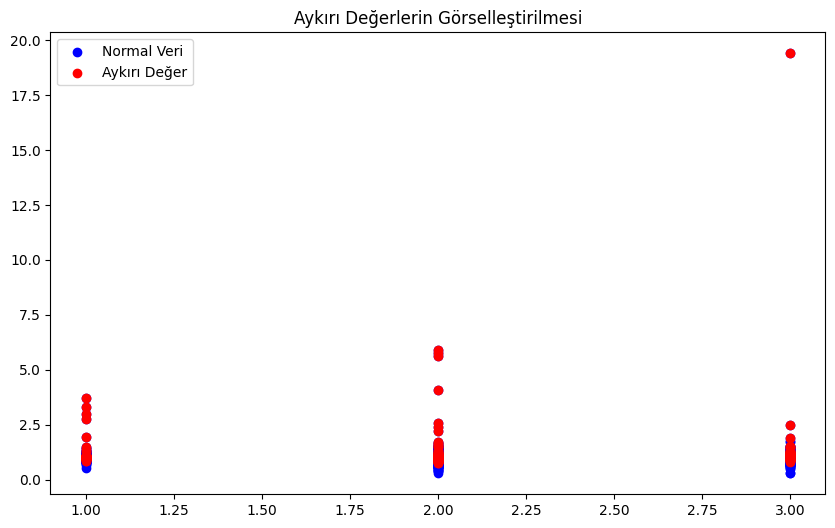

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data_without_symbol.values[:, 0], data_without_symbol.values[:, 1], color='blue', label='Normal Veri')
plt.scatter(outliers.values[:, 0], outliers.values[:, 1], color='red', label='Aykırı Değer')
plt.title('Aykırı Değerlerin Görselleştirilmesi')
plt.legend()
plt.show()

In [71]:
data.columns.tolist()

['index',
 'Sector',
 'sum_values_2005',
 'median_2005',
 'mean_2005',
 'length_2005',
 'standard_deviation_2005',
 'variance_2005',
 'root_mean_square_2005',
 'maximum_2005',
 'absolute_maximum_2005',
 'minimum_2005',
 'sum_values_2006',
 'median_2006',
 'mean_2006',
 'length_2006',
 'standard_deviation_2006',
 'variance_2006',
 'root_mean_square_2006',
 'maximum_2006',
 'absolute_maximum_2006',
 'minimum_2006',
 'sum_values_2007',
 'median_2007',
 'mean_2007',
 'length_2007',
 'standard_deviation_2007',
 'variance_2007',
 'root_mean_square_2007',
 'maximum_2007',
 'absolute_maximum_2007',
 'minimum_2007',
 'sum_values_2008',
 'median_2008',
 'mean_2008',
 'length_2008',
 'standard_deviation_2008',
 'variance_2008',
 'root_mean_square_2008',
 'maximum_2008',
 'absolute_maximum_2008',
 'minimum_2008',
 'sum_values_2009',
 'median_2009',
 'mean_2009',
 'length_2009',
 'standard_deviation_2009',
 'variance_2009',
 'root_mean_square_2009',
 'maximum_2009',
 'absolute_maximum_2009',
 'mini

## Feature Engineering

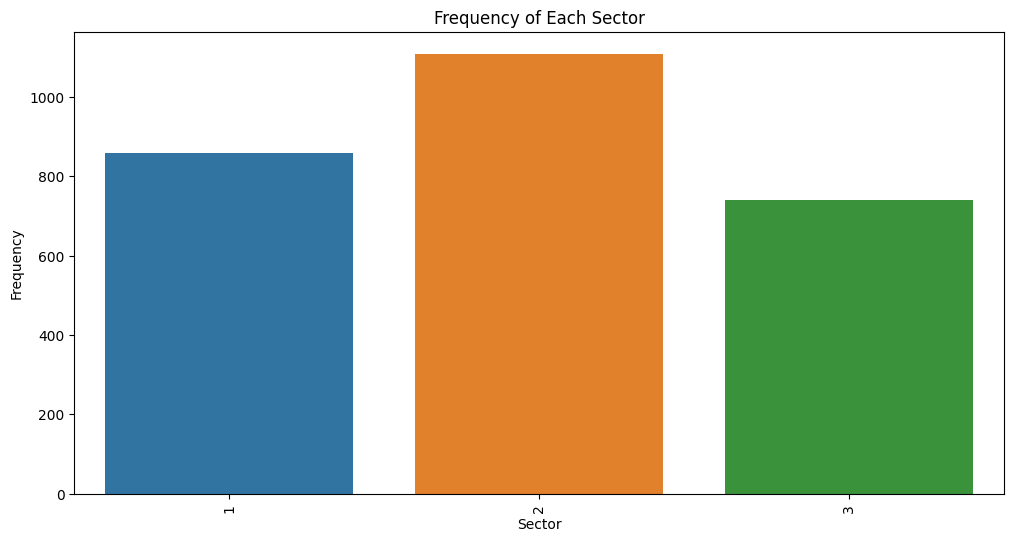

In [72]:
sector_counts = data['Sector'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=sector_counts.index, y=sector_counts.values)
plt.xticks(rotation=90)  # Eksen etiketlerini döndür
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.title('Frequency of Each Sector')
plt.show()

### Scaling

Bu aşamada 3 farklı scaling işleminden sonra görselleştirmeler yaparak bu adımın veri üzerindeki farklı etkilerini gözlemlemiş oldum.

- Standard Scaler

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

X = data.drop(columns=['Sector','index'])
y = data['Sector']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\310886746.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train_scaled_std, legend=False)


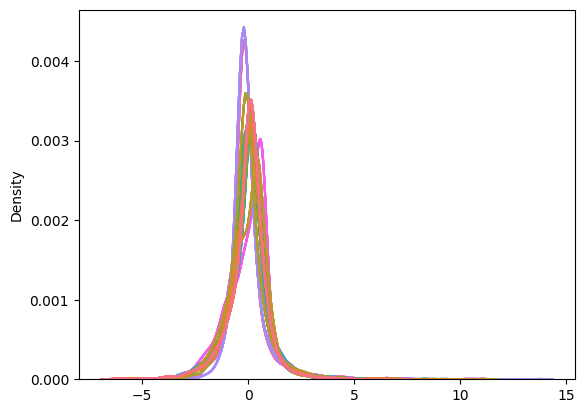

In [74]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
sns.kdeplot(X_train_scaled_std, legend=False)

plt.show()

- Max Abs Scaler

C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\2948974219.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train_scaled_std, legend=False)


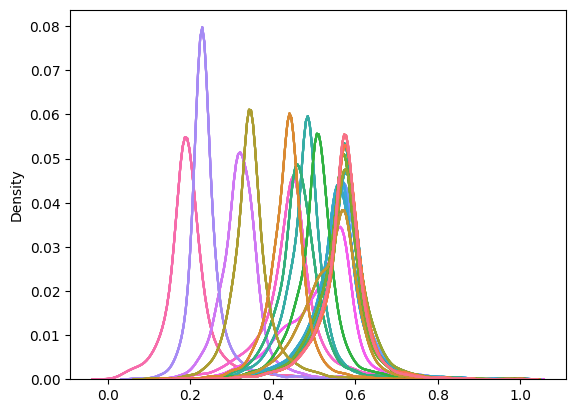

In [75]:
from sklearn.preprocessing import MaxAbsScaler
scaler_std = MaxAbsScaler()

scaler_std.fit(X_train)
scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
sns.kdeplot(X_train_scaled_std, legend=False)

plt.show()

- Robust Scaler

C:\Users\Kubra\AppData\Local\Temp\ipykernel_20440\2605754649.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train_scaled_std, legend=False)


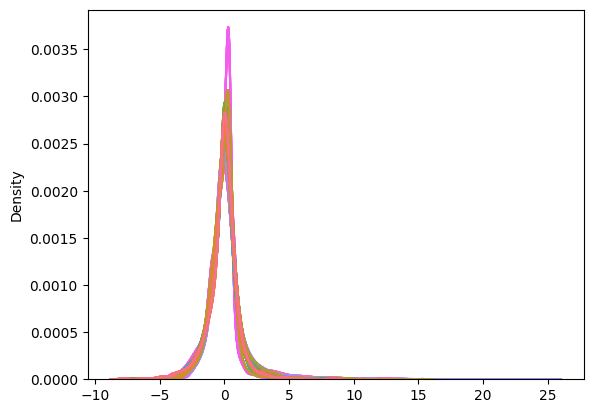

In [76]:
from sklearn.preprocessing import RobustScaler
scaler_std = RobustScaler()

scaler_std.fit(X_train)
scaler_std.fit(X_train)
X_train_scaled_std = scaler_std.transform(X_train)
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=X_train.columns)
sns.kdeplot(X_train_scaled_std, legend=False)

plt.show()

In [77]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


## PCA

Veri kümesinin boyutunu azaltmak için bu yöntemi tercih ettim. PCA ile fit edilen train kümesini X_pca değişkeninde tuttum.

In [78]:
X = data.drop(columns=['Sector','index'])
y = data['Sector']

In [79]:
pca = PCA(n_components=20)  
X_pca = pca.fit_transform(X)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

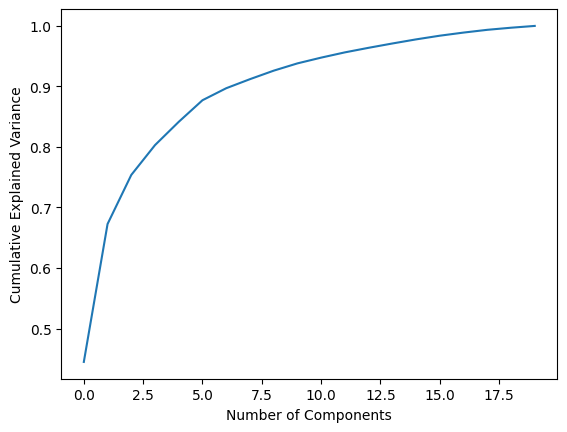

In [81]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [82]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))

[(1, 44.48),
 (2, 67.27),
 (3, 75.38),
 (4, 80.31),
 (5, 84.15),
 (6, 87.72),
 (7, 89.7),
 (8, 91.2),
 (9, 92.60000000000001),
 (10, 93.80000000000001),
 (11, 94.75000000000001),
 (12, 95.62000000000002),
 (13, 96.38000000000002),
 (14, 97.09000000000002),
 (15, 97.77000000000002),
 (16, 98.38000000000002),
 (17, 98.89000000000003),
 (18, 99.35000000000002),
 (19, 99.70000000000002)]

AttributeError: 'DataFrame' object has no attribute 'legend_elements'

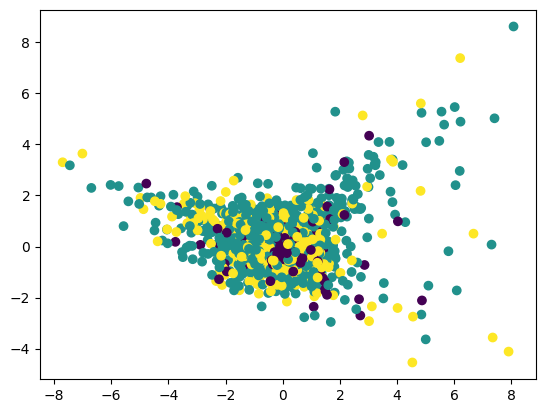

In [84]:
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train)

plt.legend(handles=data.legend_elements()[0], labels=list(range(10)))
plt.show()

## Correlation Between Variables

Korelasyon matrisini görselleştirdikten sonra, korelasyonu düşük olan değişkenleri tespit edip veriden çıkardım. Daha sonra tekrar bir korelasyon görseli ile veriyi kontrol ettim.

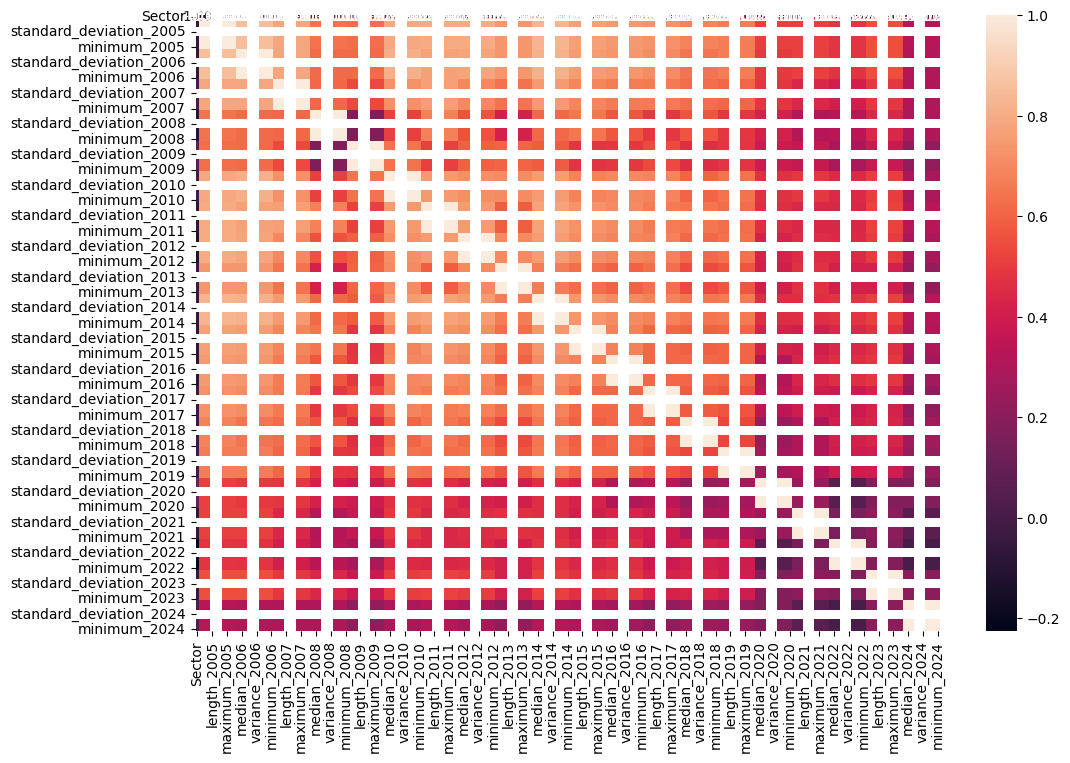

In [88]:
corrdata = data.drop(columns=['index'])
plt.figure(figsize=(12, 8))
sns.heatmap(corrdata.corr(), annot=True, fmt=".2f")
plt.show()

In [89]:
cor_target = abs(corrdata.corr()["Sector"])
relevant_features = cor_target[(cor_target < 0.1) | (cor_target > -0.1)]
print(relevant_features)

Sector                   1.000000
sum_values_2005          0.060641
median_2005              0.060641
mean_2005                0.060641
root_mean_square_2005    0.060641
                           ...   
mean_2024                0.024602
root_mean_square_2024    0.024602
maximum_2024             0.024602
absolute_maximum_2024    0.024602
minimum_2024             0.024602
Name: Sector, Length: 141, dtype: float64


In [90]:
columns_to_drop = list(set(corrdata.columns) - set(relevant_features.index))
data= data.drop(columns=columns_to_drop)

In [91]:
data

,index,Sector,sum_values_2005,median_2005,mean_2005,root_mean_square_2005,maximum_2005,absolute_maximum_2005,minimum_2005,sum_values_2006,...,maximum_2023,absolute_maximum_2023,minimum_2023,sum_values_2024,median_2024,mean_2024,root_mean_square_2024,maximum_2024,absolute_maximum_2024,minimum_2024
0,A,2,1.122764,1.122764,1.122764,1.122764,1.122764,1.122764,1.122764,1.022606,...,0.963233,0.963233,0.963233,1.132705,1.132705,1.132705,1.132705,1.132705,1.132705,1.132705
1,AACI,1,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,1.013322,...,1.017727,1.017727,1.017727,1.021079,1.021079,1.021079,1.021079,1.021079,1.021079,1.021079
2,AACT,1,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,1.014168,...,1.013809,1.013809,1.013809,1.015607,1.015607,1.015607,1.015607,1.015607,1.015607,1.015607
3,AADI,2,0.927235,0.927235,0.927235,0.927235,0.927235,0.927235,0.927235,0.927235,...,0.742070,0.742070,0.742070,0.622958,0.622958,0.622958,0.622958,0.622958,0.622958,0.622958
4,AAMC,1,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,1.300431,...,1.326933,1.326933,1.326933,1.149350,1.149350,1.149350,1.149350,1.149350,1.149350,1.149350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,ZUO,3,0.987030,0.987030,0.987030,0.987030,0.987030,0.987030,0.987030,0.987030,...,1.077405,1.077405,1.077405,1.021017,1.021017,1.021017,1.021017,1.021017,1.021017,1.021017
3003,ZURA,2,0.772850,0.772850,0.772850,0.772850,0.772850,0.772850,0.772850,0.772850,...,0.795377,0.795377,0.795377,0.682743,0.682743,0.682743,0.682743,0.682743,0.682743,0.682743
3004,ZVRA,2,0.980385,0.980385,0.980385,0.980385,0.980385,0.980385,0.980385,0.980385,...,1.020680,1.020680,1.020680,1.208136,1.208136,1.208136,1.208136,1.208136,1.208136,1.208136
3005,ZVSA,2,0.580136,0.580136,0.580136,0.580136,0.580136,0.580136,0.580136,0.580136,...,0.382820,0.382820,0.382820,0.516634,0.516634,0.516634,0.516634,0.516634,0.516634,0.516634


In [200]:
data_column = data.columns
data_column.tolist()

['index',
 'Sector',
 'sum_values_2005',
 'median_2005',
 'mean_2005',
 'root_mean_square_2005',
 'maximum_2005',
 'absolute_maximum_2005',
 'minimum_2005',
 'sum_values_2006',
 'median_2006',
 'mean_2006',
 'root_mean_square_2006',
 'maximum_2006',
 'absolute_maximum_2006',
 'minimum_2006',
 'sum_values_2007',
 'median_2007',
 'mean_2007',
 'root_mean_square_2007',
 'maximum_2007',
 'absolute_maximum_2007',
 'minimum_2007',
 'sum_values_2008',
 'median_2008',
 'mean_2008',
 'root_mean_square_2008',
 'maximum_2008',
 'absolute_maximum_2008',
 'minimum_2008',
 'sum_values_2009',
 'median_2009',
 'mean_2009',
 'root_mean_square_2009',
 'maximum_2009',
 'absolute_maximum_2009',
 'minimum_2009',
 'sum_values_2010',
 'median_2010',
 'mean_2010',
 'root_mean_square_2010',
 'maximum_2010',
 'absolute_maximum_2010',
 'minimum_2010',
 'sum_values_2011',
 'median_2011',
 'mean_2011',
 'root_mean_square_2011',
 'maximum_2011',
 'absolute_maximum_2011',
 'minimum_2011',
 'sum_values_2012',
 'media

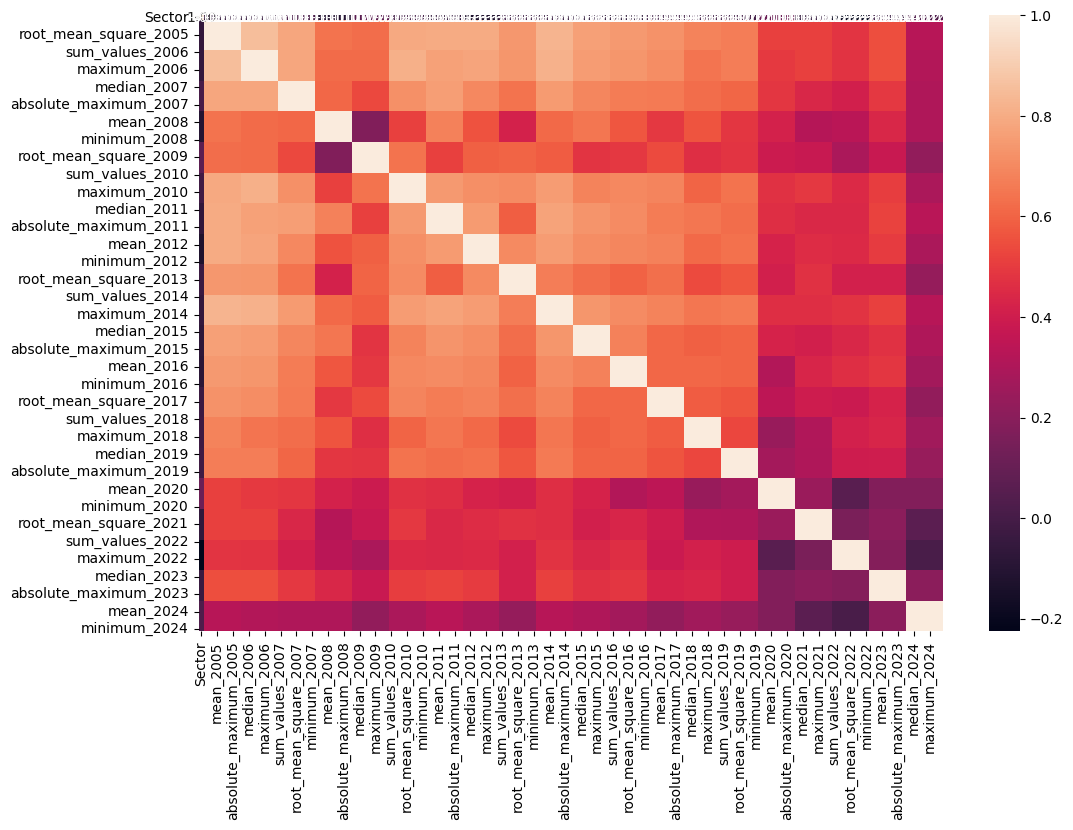

In [93]:
corrdata2 = data.drop(columns=['index'])
plt.figure(figsize=(12, 8))
sns.heatmap(corrdata2.corr(), annot=True, fmt=".2f")
plt.show()

## Modelling

Tüm bu işlemlerden sonra modelleme işlemine geçtim. 
- En iyi sonucu %68 ile SVM'de aldım.
- Logistic Regression ile %61 accuracy elde ettim.
- Random Forest Regressor ile %35 MSE sonucu aldım.

Sonuçlar çok iyi değildi ve ilk etapta SVM ile aldığım %59 sonucu %68 çıkardım. Yine de tatmin edici bir sonuç olduğunu düşünmüyorum fakat daha rahat bir zaman aralığında biraz daha üstüne düşerek ve çabalayarak bu değeri biraz daha yükseltebileceğime inanıyorum.

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

X = data.drop(columns=['Sector','index'])
y = data['Sector']

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Veriyi ölçeklendirme
    ('classifier', DecisionTreeClassifier(random_state=42))  # Karar ağacı sınıflandırıcısı
])

# Destek vektör makineleri için pipeline
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),  # Veriyi ölçeklendirme
    ('classifier', SVC(random_state=42))  # Destek vektör makinesi sınıflandırıcısı
])

# Modelleri eğitin
pipeline_dt.fit(X_train, y_train)
pipeline_svm.fit(X_train, y_train)

# Modelleri test edin
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)

# Test doğruluğunu değerlendirin
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Decision Tree Test Accuracy:", accuracy_dt)
print("Support Vector Machine Test Accuracy:", accuracy_svm)

Decision Tree Test Accuracy: 0.5811808118081181
Support Vector Machine Test Accuracy: 0.6808118081180812


In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

X = data.drop(columns=['Sector','index'])
y = data['Sector']

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

classification_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

classification_pipeline.fit(X_train, y_train)
y_pred_classification = classification_pipeline.predict(X_test)
classification_accuracy = accuracy_score(y_test, y_pred_classification)
print("Classification Accuracy:", classification_accuracy)

regression_pipeline.fit(X_train, y_train)
y_pred_regression = regression_pipeline.predict(X_test)
regression_mse = mean_squared_error(y_test, y_pred_regression)
print("Regression Mean Squared Error:", regression_mse)

Classification Accuracy: 0.6180811808118081
Regression Mean Squared Error: 0.35405286392115926


In [135]:
from joblib import dump

dump(classification_pipeline, 'classification_model.joblib')
dump(regression_pipeline, 'regression_model.joblib')
dump(pipeline_dt, 'pipeline_dt.joblib')
dump(pipeline_svm, 'pipeline_svm.joblib')


['pipeline_svm.joblib']

In [136]:
classification_predictions = classification_pipeline.predict(X_test)
regression_predictions = regression_pipeline.predict(X_test)
dt_predictions = pipeline_dt.predict(X_test)
svm_predictions = pipeline_svm.predict(X_test)

In [148]:
results = pd.DataFrame({
    'Actual_Sector': y_test,
    'DecisionTree_Predictions': dt_predictions,
    'SVM_Predictions': svm_predictions,
    'Classification_Predictions': classification_predictions,
    'Regression_Predictions': regression_predictions
})

In [142]:
results.head(50)

,Actual_Sector,DecisionTree_Predictions,SVM_Predictions,Classification_Predictions,Regression_Predictions
1162,2,2,2,2,1.986952
488,1,2,2,1,1.820000
1913,2,2,2,2,2.130000
338,2,2,3,3,2.720000
2447,3,1,3,3,2.500000
533,1,1,1,1,1.150000
1205,2,3,1,2,2.670000
2305,2,1,1,1,1.710000
2437,3,2,1,1,2.255643
360,2,2,2,2,2.210000


## Test Sectors

In [96]:
energy = pd.read_csv('../YZUP_Ara_Proje_HaticeKubraDogan/data/stock_sectors/energy.csv')
utilities = pd.read_csv('../YZUP_Ara_Proje_HaticeKubraDogan/data/stock_sectors/utilities.csv')
materials = pd.read_csv('../YZUP_Ara_Proje_HaticeKubraDogan/data/stock_sectors/materials.csv')
industrials = pd.read_csv('../YZUP_Ara_Proje_HaticeKubraDogan/data/stock_sectors/industrials.csv')

In [97]:
industrials_symbol = industrials.Symbol
industrials_symbol_list = industrials_symbol.tolist()
print(industrials_symbol_list[:20])

['GE', 'CAT', 'UNP', 'UPS', 'HON', 'RTX', 'BA', 'ETN', 'LMT', 'DE', 'ADP', 'WM', 'CP', 'CNI', 'ITW', 'GD', 'CSX', 'TRI', 'NOC', 'PH']


In [98]:
ticker_energy = ['XOM', 'CVX', 'SHEL', 'TTE', 'COP', 'BP', 'PBR.A', 'PBR', 'CNQ', 'ENB', 'EQNR', 'SLB', 'EOG', 'MPC', 'PSX', 'EPD', 'PXD', 'OXY', 'E', 'ET']
ticker_utilities = ['NEE', 'SO', 'DUK', 'CEG', 'NGG', 'SRE', 'AEP', 'PCG', 'D', 'EXC', 'PEG', 'ED', 'XEL', 'EIX', 'WEC', 'AWK', 'DTE', 'FE', 'ETR', 'ES']
ticker_materials = ['LIN', 'BHP', 'RIO', 'SHW', 'SCCO', 'ECL', 'CRH', 'FCX', 'VALE', 'APD', 'NUE', 'DOW', 'NEM', 'CTVA', 'MLM', 'VMC', 'PPG', 'LYB', 'DD', 'GOLD']
ticker_industrials = ['GE', 'CAT', 'UNP', 'UPS', 'HON', 'RTX', 'BA', 'ETN', 'LMT', 'DE', 'ADP', 'WM', 'CP', 'CNI', 'ITW', 'GD', 'CSX', 'TRI', 'NOC', 'PH']

In [269]:
import warnings

# Uyarıları filtrele
warnings.filterwarnings("ignore")

def process_data(ticker_list):
    # Veri indirme
    data = yfinance.download(ticker_list, start='2005-01-01')['Adj Close'].resample('M').last().pct_change()+1
    data = pd.DataFrame(data)

       # 3 aylık getiri hesaplama
    def get_rolling_ret(data, n):
        return data.rolling(n).apply(np.prod)
    data = get_rolling_ret(data, 3)
    
    # Tarih ve fiyat verilerinin düzenlenmesi
    data.reset_index(inplace=True)
    tickers = data.columns.get_level_values('Ticker')
    data = pd.concat([data['Date'], data[tickers]], axis=1)
    data = data.loc[:, ~data.columns.duplicated(keep='first')]
    
    # Transpoze ve sektör sütunlarının ekleme
    transposed_data = data.transpose()
    transposed_data.columns = transposed_data.iloc[0]
    transposed_data = transposed_data[1:]
    
    # Eksik değerleri ortalama ile doldurma
    for index, row in transposed_data.iterrows():
        row_mean = row.mean()
        transposed_data.loc[index] = row.fillna(row_mean)
        
    transposed_data['Sector'] = None  # Sektör sütununu oluşturma
    transposed_data.reset_index(inplace=True)
    transposed_data = transposed_data.fillna(1)
    # Özellik çıkarma
    features = tsfresh.extract_features(transposed_data, column_id='index', column_sort='Sector', 
                                        default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    features.reset_index(inplace=True)
    
    # Oluşturulan özellikleri ve sektör sütununu birleştirme
    processed_data = pd.concat([features, transposed_data['Sector']], axis=1)
    
    # Yıllara göre ortalama değerlerin hesaplanması
    years = range(2005, 2025)
    for year in years:
        for result_type in ['sum_values', 'median', 'mean', 'length', 'standard_deviation', 'variance', 'root_mean_square', 'maximum', 'absolute_maximum', 'minimum']:
            columns_to_average = [col for col in processed_data.columns if col.startswith(str(year)) and col.endswith(result_type)]
            
            if columns_to_average:
                processed_data[f'{result_type}_{year}'] = processed_data[columns_to_average].mean(axis=1)
    
    # İstenmeyen sütunların silinmesi
    columns_to_drop = [col for col in processed_data.columns if col.startswith('2')]
    processed_data.drop(columns=columns_to_drop, inplace=True)

    unwanted_columns = ['mean_2005', 'root_mean_square_2005','absolute_maximum_2005', 'minimum_2005', 'sum_values_2006', 'median_2006', 'mean_2006', 'root_mean_square_2006','absolute_maximum_2006', 'minimum_2006', 'sum_values_2007', 'median_2007', 'mean_2007', 'root_mean_square_2007', 'maximum_2007', 'absolute_maximum_2007', 'minimum_2007', 'sum_values_2008', 'median_2008', 'mean_2008', 'root_mean_square_2008', 'maximum_2008', 'absolute_maximum_2008', 'minimum_2008', 'sum_values_2009', 'median_2009', 'mean_2009','maximum_2009', 'minimum_2009', 'sum_values_2010', 'median_2010', 'mean_2010', 'root_mean_square_2010', 'maximum_2010', 'absolute_maximum_2010', 'minimum_2010', 'sum_values_2011','mean_2011', 'absolute_maximum_2011', 'minimum_2011', 'sum_values_2012', 'mean_2012', 'maximum_2012', 'absolute_maximum_2012', 'minimum_2012', 'sum_values_2013', 'median_2013', 'mean_2013', 'root_mean_square_2013', 'maximum_2013', 'minimum_2013', 'sum_values_2014', 'mean_2014', 'root_mean_square_2014', 'maximum_2014', 'minimum_2014', 'sum_values_2015', 'median_2015', 'mean_2015', 'maximum_2015', 'absolute_maximum_2015', 'minimum_2015', 'sum_values_2016', 'mean_2016', 'root_mean_square_2016', 'maximum_2016', 'absolute_maximum_2016', 'minimum_2016', 'median_2017', 'mean_2017', 'root_mean_square_2017', 'maximum_2017', 'absolute_maximum_2017', 'minimum_2017', 'sum_values_2018', 'median_2018', 'mean_2018', 'root_mean_square_2018', 'maximum_2018', 'minimum_2018', 'sum_values_2019', 'median_2019', 'mean_2019', 'root_mean_square_2019', 'maximum_2019', 'absolute_maximum_2019', 'sum_values_2020', 'median_2020', 'mean_2020', 'maximum_2020', 'absolute_maximum_2020', 'minimum_2020', 'sum_values_2021', 'median_2021', 'mean_2021', 'root_mean_square_2021', 'maximum_2021', 'absolute_maximum_2021', 'minimum_2021', 'sum_values_2022', 'median_2022', 'mean_2022', 'root_mean_square_2022', 'maximum_2022', 'absolute_maximum_2022', 'minimum_2022', 'sum_values_2023', 'median_2023', 'mean_2023', 'root_mean_square_2023', 'maximum_2023', 'absolute_maximum_2023', 'minimum_2023', 'sum_values_2024', 'median_2024', 'mean_2024', 'root_mean_square_2024', 'maximum_2024', 'absolute_maximum_2024', 'minimum_2024','length_2005', 'standard_deviation_2005', 'variance_2005', 'length_2006', 'standard_deviation_2006', 'variance_2006', 'length_2007', 'standard_deviation_2007', 'variance_2007', 'length_2008', 'standard_deviation_2008', 'variance_2008', 'length_2009', 'standard_deviation_2009', 'variance_2009', 'length_2010', 'standard_deviation_2010', 'variance_2010', 'length_2011', 'standard_deviation_2011', 'variance_2011', 'length_2012', 'standard_deviation_2012', 'variance_2012', 'length_2013', 'standard_deviation_2013', 'variance_2013', 'length_2014', 'standard_deviation_2014', 'variance_2014', 'length_2015', 'standard_deviation_2015', 'variance_2015', 'length_2016', 'standard_deviation_2016', 'variance_2016', 'length_2017', 'standard_deviation_2017', 'variance_2017', 'length_2018', 'standard_deviation_2018', 'variance_2018', 'length_2019', 'standard_deviation_2019', 'variance_2019', 'length_2020', 'standard_deviation_2020', 'variance_2020', 'length_2021', 'standard_deviation_2021', 'variance_2021', 'length_2022', 'standard_deviation_2022', 'variance_2022', 'length_2023', 'standard_deviation_2023', 'variance_2023', 'length_2024', 'standard_deviation_2024', 'variance_2024']
    processed_data = processed_data.drop(columns=unwanted_columns)
    
    return processed_data

In [270]:
processed_data = process_data(ticker_energy)
print(ticker_energy)

[*********************100%%**********************]  20 of 20 completed

1 Failed download:
['PBR.A']: Exception('%ticker%: No timezone found, symbol may be delisted')
Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.33it/s]


['XOM', 'CVX', 'SHEL', 'TTE', 'COP', 'BP', 'PBR.A', 'PBR', 'CNQ', 'ENB', 'EQNR', 'SLB', 'EOG', 'MPC', 'PSX', 'EPD', 'PXD', 'OXY', 'E', 'ET']


In [271]:
energy_data = pd.DataFrame(processed_data)
energy_data['Sector'] = None

In [272]:
energy_data

,index,Sector,sum_values_2005,median_2005,maximum_2005,maximum_2006,root_mean_square_2009,absolute_maximum_2009,median_2011,root_mean_square_2011,...,root_mean_square_2012,absolute_maximum_2013,median_2014,absolute_maximum_2014,root_mean_square_2015,median_2016,sum_values_2017,absolute_maximum_2018,minimum_2019,root_mean_square_2020
0,BP,None,1.024490,1.024490,1.024490,1.016743,1.072248,1.072248,1.026898,1.026898,...,1.008252,1.045226,0.976290,0.976290,0.977867,1.038391,1.052925,1.015471,0.999881,0.864737
1,CNQ,None,1.184416,1.184416,1.184416,1.054951,1.153955,1.153955,1.000214,1.000214,...,0.956138,1.036220,1.020050,1.020050,0.933212,1.108431,1.029080,0.941747,1.042194,0.990002
2,COP,None,1.062913,1.062913,1.062913,1.028928,1.018610,1.018610,1.051543,1.051543,...,1.027533,1.070612,1.007032,1.007032,0.947161,1.007117,1.035073,1.071803,0.985384,0.917158
3,CVX,None,1.012199,1.012199,1.012199,1.065335,1.019292,1.019292,1.068446,1.068446,...,1.018244,1.041099,0.993468,0.993468,0.963239,1.067745,1.031338,0.997495,1.021863,0.934840
4,E,None,1.040766,1.040766,1.040766,1.065504,1.040500,1.040500,1.024850,1.024850,...,1.047958,1.026812,0.965194,0.965194,0.960845,1.004270,1.042000,1.014666,0.996296,0.907790
5,ENB,None,1.067927,1.067927,1.067927,1.036590,1.088486,1.088486,1.073939,1.073939,...,1.043882,1.019439,1.039169,1.039169,0.947089,1.051677,0.987395,0.968079,1.062837,0.968605
6,EOG,None,1.147503,1.147503,1.147503,0.989304,1.063615,1.063615,1.035185,1.035185,...,1.060860,1.101226,1.028698,1.028698,0.974076,1.064283,1.019382,1.000236,0.940183,0.922012
7,EPD,None,1.004306,1.004306,1.004306,1.049998,1.102604,1.102604,1.035355,1.035355,...,1.045813,1.069566,1.047513,1.047513,0.932036,1.019637,1.008565,1.026487,1.027590,0.958583
8,EQNR,None,1.103861,1.103861,1.103861,1.063158,1.102413,1.102413,1.061726,1.061726,...,1.005135,1.002412,0.992906,0.992906,0.950916,1.053890,1.058602,1.048588,0.965385,0.966824
9,ET,None,1.050756,1.050756,1.050756,1.084473,1.171428,1.171428,1.013387,1.013387,...,1.063853,1.150614,1.131620,1.131620,0.909360,1.148725,1.020714,0.985973,0.986752,0.901703


In [283]:
X_energy = energy_data.drop(columns=['index', 'Sector'])
y_energy = energy_data['Sector']
classification_energy = classification_pipeline.predict(X_energy)
dt_energy = pipeline_dt.predict(X_energy)
svm_energy = pipeline_svm.predict(X_energy)
result_energy = pd.DataFrame({
    'DecisionTree_Predictions': dt_energy,
    'SVM_Predictions': svm_energy,
    'Classification_Predictions': classification_energy
})
result_energy

,DecisionTree_Predictions,SVM_Predictions,Classification_Predictions
0,1,2,2
1,1,2,2
2,1,2,2
3,1,2,2
4,1,2,2
5,1,2,2
6,1,2,2
7,1,2,2
8,1,2,2
9,1,2,2


In [274]:
processed_data = process_data(ticker_utilities)

[*********************100%%**********************]  20 of 20 completed
Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  9.97it/s]


In [275]:
utilities_data = pd.DataFrame(processed_data)
utilities_data['Sector'] = None
utilities_data

,index,Sector,sum_values_2005,median_2005,maximum_2005,maximum_2006,root_mean_square_2009,absolute_maximum_2009,median_2011,root_mean_square_2011,...,root_mean_square_2012,absolute_maximum_2013,median_2014,absolute_maximum_2014,root_mean_square_2015,median_2016,sum_values_2017,absolute_maximum_2018,minimum_2019,root_mean_square_2020
0,AEP,None,1.035871,1.035871,1.035871,1.044251,1.022436,1.022436,1.038559,1.038559,...,1.032746,1.034344,1.070864,1.070864,1.002486,1.034068,1.058122,1.011649,1.064478,0.991515
1,AWK,None,1.036919,1.036919,1.036919,1.036919,1.023139,1.023139,1.071175,1.071175,...,1.055003,1.039650,1.065663,1.065663,1.031569,1.068743,1.061041,1.010908,1.081744,1.063537
2,CEG,None,1.164758,1.164758,1.164758,1.164758,1.164758,1.164758,1.164758,1.164758,...,1.164758,1.164758,1.164758,1.164758,1.164758,1.164758,1.164758,1.164758,1.164758,1.164758
3,D,None,1.028685,1.028685,1.028685,1.028116,1.019298,1.019298,1.062999,1.062999,...,1.009735,1.066910,1.044524,1.044524,0.993337,1.032752,1.032938,0.983596,1.047373,0.998504
4,DTE,None,1.009578,1.009578,1.009578,1.035007,1.058759,1.058759,1.052511,1.052511,...,1.046368,1.037619,1.065876,1.065876,1.002948,1.053650,1.047663,1.015174,1.036571,1.010714
5,DUK,None,1.017787,1.017787,1.017787,1.057280,1.033598,1.033598,1.056992,1.056992,...,1.017541,1.035010,1.052609,1.052609,0.972545,1.036935,1.042612,1.010175,1.027667,1.016987
6,ED,None,1.032984,1.032984,1.032984,1.027036,1.030820,1.030820,1.061970,1.061970,...,1.000604,1.007852,1.047379,1.047379,1.012126,1.045509,1.053548,0.983057,1.047638,0.969873
7,EIX,None,1.088401,1.088401,1.088401,1.015426,1.014157,1.014157,1.029066,1.029066,...,1.040312,1.015984,1.089103,1.089103,0.992488,1.056423,1.020838,0.964811,1.051213,0.989071
8,ES,None,1.015310,1.015310,1.015310,1.106233,1.024167,1.024167,1.036616,1.036616,...,1.037291,1.028766,1.061642,1.061642,1.010622,1.024500,1.050721,1.017906,1.071739,1.018731
9,ETR,None,1.011974,1.011974,1.011974,1.075051,1.008926,1.008926,1.008826,1.008826,...,0.997916,1.002807,1.092989,1.092989,0.957170,1.030143,1.054759,1.015888,1.097059,0.980578


In [282]:
X_utilities = utilities_data.drop(columns=['index', 'Sector'])
y_utilities = utilities_data['Sector']
classification_utilities = classification_pipeline.predict(X_utilities)
dt_utilities = pipeline_dt.predict(X_utilities)
svm_utilities = pipeline_svm.predict(X_utilities)
result_utilities = pd.DataFrame({
    'DecisionTree_Predictions': dt_utilities,
    'SVM_Predictions': svm_utilities,
    'Classification_Predictions': classification_utilities
})
result_utilities

,DecisionTree_Predictions,SVM_Predictions,Classification_Predictions
0,1,2,2
1,1,2,2
2,1,2,2
3,1,2,2
4,1,2,2
5,1,2,2
6,1,2,2
7,1,2,2
8,1,2,2
9,1,2,2


In [276]:
processed_data = process_data(ticker_materials)

[*********************100%%**********************]  20 of 20 completed
Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.14it/s]


In [278]:
materials_data = pd.DataFrame(processed_data)
materials_data['Sector'] = None
materials_data

,index,Sector,sum_values_2005,median_2005,maximum_2005,maximum_2006,root_mean_square_2009,absolute_maximum_2009,median_2011,root_mean_square_2011,...,root_mean_square_2012,absolute_maximum_2013,median_2014,absolute_maximum_2014,root_mean_square_2015,median_2016,sum_values_2017,absolute_maximum_2018,minimum_2019,root_mean_square_2020
0,APD,None,1.000614,1.000614,1.000614,1.051715,1.131877,1.131877,1.004097,1.004097,...,0.998977,1.087691,1.071852,1.071852,0.997218,1.037786,1.044595,1.001562,1.104960,1.064596
1,BHP,None,1.052067,1.052067,1.052067,1.074975,1.176329,1.176329,0.979454,0.979454,...,1.009941,0.998464,0.948085,0.948085,0.876923,1.088083,1.059536,1.036468,1.058017,1.051968
2,CRH,None,1.014030,1.014030,1.014030,1.104121,1.063089,1.063089,1.036247,1.036247,...,1.013760,1.085480,0.994840,0.994840,1.059891,1.049119,1.026883,0.947306,1.092457,1.025249
3,CTVA,None,1.042332,1.042332,1.042332,1.042332,1.042332,1.042332,1.042332,1.042332,...,1.042332,1.042332,1.042332,1.042332,1.042332,1.042332,1.042332,1.042332,1.015567,1.091753
4,DD,None,0.980667,0.980667,0.980667,0.984555,1.243473,1.243473,0.993509,0.993509,...,1.037897,1.086921,1.052328,1.052328,1.036472,1.031818,1.075322,0.946805,0.961115,1.038546
5,DOW,None,1.029618,1.029618,1.029618,1.029618,1.029618,1.029618,1.029618,1.029618,...,1.029618,1.029618,1.029618,1.029618,1.029618,1.029618,1.029618,1.029618,1.031989,1.037068
6,ECL,None,1.021181,1.021181,1.021181,1.074477,1.057407,1.057407,1.040788,1.040788,...,1.065528,1.108183,1.009152,1.009152,1.026163,1.001912,1.039369,1.039846,1.061553,1.029660
7,FCX,None,1.104671,1.104671,1.104671,1.060554,1.344563,1.344563,0.951886,0.951886,...,1.008072,1.024704,0.939388,0.939388,0.798506,1.235179,1.062316,0.947659,1.021946,1.249151
8,GOLD,None,1.038993,1.038993,1.038993,1.044706,1.100650,1.100650,0.995400,0.995400,...,0.940926,0.859318,0.917541,0.917541,0.930352,1.278286,0.979893,0.991233,1.094714,1.105434
9,LIN,None,1.046151,1.046151,1.046151,1.047524,1.082214,1.082214,1.035577,1.035577,...,1.016642,1.047832,1.007122,1.007122,0.967546,1.031373,1.072129,1.020801,1.071122,1.060867


In [281]:
X_materials = materials_data.drop(columns=['index', 'Sector'])
y_materials = materials_data['Sector']
classification_materials = classification_pipeline.predict(X_materials)
dt_materials = pipeline_dt.predict(X_materials)
svm_materials = pipeline_svm.predict(X_materials)
result_materials = pd.DataFrame({
    'DecisionTree_Predictions': dt_materials,
    'SVM_Predictions': svm_materials,
    'Classification_Predictions': classification_materials
})
result_materials

,DecisionTree_Predictions,SVM_Predictions,Classification_Predictions
0,1,2,2
1,1,2,2
2,1,2,2
3,1,2,2
4,1,2,2
5,1,2,2
6,1,2,2
7,1,2,2
8,1,2,2
9,1,2,2


In [285]:
processed_data = process_data(ticker_industrials)

[*********************100%%**********************]  20 of 20 completed
Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 10.66it/s]


In [287]:
industrials_data = pd.DataFrame(processed_data)
industrials_data['Sector'] = None
industrials_data

,index,Sector,sum_values_2005,median_2005,maximum_2005,maximum_2006,root_mean_square_2009,absolute_maximum_2009,median_2011,root_mean_square_2011,...,root_mean_square_2012,absolute_maximum_2013,median_2014,absolute_maximum_2014,root_mean_square_2015,median_2016,sum_values_2017,absolute_maximum_2018,minimum_2019,root_mean_square_2020
0,ADP,None,1.027733,1.027733,1.027733,1.018014,1.035862,1.035862,1.049631,1.049631,...,1.029984,1.090752,1.057408,1.057408,1.014983,1.033183,1.058164,1.058903,1.052870,1.018643
1,BA,None,1.069278,1.069278,1.069278,1.069073,1.057270,1.057270,1.023558,1.023558,...,1.022487,1.171211,0.999061,0.999061,1.040379,1.021403,1.176969,1.068223,1.015719,0.916548
2,CAT,None,1.069793,1.069793,1.069793,1.037585,1.139687,1.139687,1.045034,1.045034,...,0.993884,1.008054,1.042168,1.042168,0.937960,1.077989,1.135173,0.980999,1.040417,1.063468
3,CNI,None,1.075550,1.075550,1.075550,1.052365,1.093222,1.093222,1.056121,1.056121,...,1.038965,1.066379,1.063985,1.063985,0.962416,1.035219,1.056930,1.012812,1.030964,1.049246
4,CP,None,1.064114,1.064114,1.064114,1.077110,1.100320,1.100320,1.008184,1.008184,...,1.116749,1.130679,1.079023,1.079023,0.918707,1.023739,1.052848,1.033266,1.055250,1.085870
5,CSX,None,1.058219,1.058219,1.058219,1.109771,1.087767,1.087767,1.027456,1.027456,...,0.987979,1.091078,1.079122,1.079122,0.939456,1.072491,1.137337,1.069265,1.021707,1.059822
6,DE,None,1.007517,1.007517,1.007517,1.099134,1.107482,1.107482,1.013821,1.013821,...,1.032657,1.008708,1.011653,1.011653,0.985641,1.066824,1.117769,1.010515,1.049040,1.122520
7,ETN,None,1.000522,1.000522,1.000522,1.054513,1.099998,1.099998,1.001230,1.001230,...,1.053974,1.102567,0.990549,0.990549,0.962758,1.058542,1.056367,0.989008,1.071329,1.071501
8,GD,None,1.034109,1.034109,1.034109,1.067662,1.059927,1.059927,1.003056,1.003056,...,1.019884,1.085094,1.122294,1.122294,1.011186,1.044143,1.059590,0.966643,1.018617,0.961250
9,GE,None,1.002898,1.002898,1.002898,1.015551,1.024720,1.024720,1.022637,1.022637,...,1.069935,1.073759,0.999140,0.999140,1.052072,1.012502,0.896070,0.834176,1.096366,1.023478


In [288]:
X_industrials = industrials_data.drop(columns=['index', 'Sector'])
y_industrials = industrials_data['Sector']
classification_industrials = classification_pipeline.predict(X_industrials)
dt_industrials = pipeline_dt.predict(X_industrials)
svm_industrials = pipeline_svm.predict(X_industrials)
result_industrials = pd.DataFrame({
    'DecisionTree_Predictions': dt_materials,
    'SVM_Predictions': svm_materials,
    'Classification_Predictions': classification_materials
})
result_industrials

,DecisionTree_Predictions,SVM_Predictions,Classification_Predictions
0,1,2,2
1,1,2,2
2,1,2,2
3,1,2,2
4,1,2,2
5,1,2,2
6,1,2,2
7,1,2,2
8,1,2,2
9,1,2,2
